<span style="color:red"><b>This notebook has been re-run after writing the paper. This might have resulted in some discrepancies between the text and graphics in the paper and the results printed by the code for all machine learning models in this notebook.</b></span>

# Wetterdaten Hannover

## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
print('modules imported')

modules imported


## Import and plot location

In [2]:
df_locs = pd.read_csv('Metadaten_Geographie_02014.txt', sep=';',
                      parse_dates=['von_datum', 'bis_datum'])
display(df_locs)

Stations_id  Stationshoehe  Geogr.Breite  Geogr.Laenge  von_datum  \
0         2014          51.00       52.4592        9.6999 1856-01-01   
1         2014          52.00       52.4592        9.6891 1957-04-01   
2         2014          53.00       52.4558        9.7107 1964-11-05   
3         2014          53.00       52.4647        9.6994 1967-10-05   
4         2014          58.46       52.4644        9.6779 1992-06-03   

   bis_datum Stationsname  
0 1957-03-31     Hannover  
1 1964-11-04     Hannover  
2 1967-10-04     Hannover  
3 1992-06-02     Hannover  
4 2021-07-21     Hannover

In [3]:
map_ws = folium.Map(location=[52.4592, 9.6994], zoom_start=13, 
                    tiles='https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}{r}.png', attr='wikimediafoundation.org')

for latitude, longitude, von in zip(df_locs['Geogr.Breite'], df_locs['Geogr.Laenge'],
                                          df_locs['von_datum']):
    folium.CircleMarker(
        [latitude, longitude],
        radius=4,
        weight=0.5,
        color='black',
        tooltip = von,
        fill = True,
        fill_color='red',
        fill_opacity=1
    ).add_to(map_ws)
    
display(map_ws)

## Import Dataset

Datenquelle: https://www.dwd.de/DE/leistungen/klimadatendeutschland/klarchivtagmonat.html

In [4]:
df = pd.read_csv('Wetterdaten Hannover.txt', sep=';', index_col='MESS_DATUM', parse_dates=['MESS_DATUM'],
                 na_values=-999.0, skipinitialspace=True)
display(df.head(2))

STATIONS_ID  QN_3  FX  FM  QN_4  RSK  RSKF  SDK  SHK_TAG   NM  \
MESS_DATUM                                                                  
1936-01-01         2014   NaN NaN NaN     5  0.3     1  3.1        0  6.7   
1936-01-02         2014   NaN NaN NaN     5  0.2     1  2.4        0  6.7   

            VPM     PM  TMK   UPM  TXK  TNK  TGK  eor  
MESS_DATUM                                             
1936-01-01  7.6  993.4  7.9  70.0  9.9  6.9  NaN  eor  
1936-01-02  8.0  988.2  7.1  77.0  9.4  5.9  NaN  eor

## Import metadata

In [5]:
df_meta = pd.read_csv('Metadata8.txt', sep=';')
df_columns = df_meta[['Parameter', 'Parameterbeschreibung', 'Einheit']].drop_duplicates().dropna()
display(df_columns)

Parameter                              Parameterbeschreibung  \
0         FM  Tagesmittel der Windgeschwindigkeit m/s  Messn...   
6         FX                  Maximum der Windspitze Messnetz 3   
14        NM                   Tagesmittel des Bedeckungsgrades   
16        PM                         Tagesmittel des Luftdrucks   
18       RSK                            tgl. Niederschlagshoehe   
20      RSKF   tgl. Niederschlagsform (=Niederschlagshoehe_ind)   
22       SDK                       Sonnenscheindauer Tagessumme   
24   SHK_TAG                              Schneehoehe Tageswert   
26       TGK  Minimum der Lufttemperatur am Erdboden in 5cm ...   
28       TMK                         Tagesmittel der Temperatur   
30       TNK        Tagesminimum der Lufttemperatur in 2m Hoehe   
32       TXK         Tagesmaximum der Lufttemperatur in 2m Höhe   
34       UPM                  Tagesmittel der Relativen Feuchte   
36       VPM                       Tagesmittel des Dampfdruckes   

             Einheit  
0              m/sec  
6              m/sec  
14            Achtel  
16               hpa  
18                mm  
20  numerischer Code  
22            Stunde  
24                cm  
26                °C  
28                °C  
30                °C  
32                °C  
34                 %  
36               hpa

## Get some basic information

In [6]:
print(df.shape)

(30154, 18)


In [7]:
for col in df.columns:
    print(col, '\tdtype:', df[col].dtype, '\tunique:', df[col].nunique(), '\tmissing:', df[col].isna().sum())

STATIONS_ID 	dtype: int64 	unique: 1 	missing: 0
QN_3 	dtype: float64 	unique: 4 	missing: 4029
FX 	dtype: float64 	unique: 290 	missing: 5481
FM 	dtype: float64 	unique: 130 	missing: 4057
QN_4 	dtype: int64 	unique: 4 	missing: 0
RSK 	dtype: float64 	unique: 329 	missing: 0
RSKF 	dtype: int64 	unique: 6 	missing: 0
SDK 	dtype: float64 	unique: 778 	missing: 107
SHK_TAG 	dtype: int64 	unique: 44 	missing: 0
NM 	dtype: float64 	unique: 81 	missing: 0
VPM 	dtype: float64 	unique: 218 	missing: 0
PM 	dtype: float64 	unique: 2046 	missing: 0
TMK 	dtype: float64 	unique: 444 	missing: 0
UPM 	dtype: float64 	unique: 996 	missing: 0
TXK 	dtype: float64 	unique: 486 	missing: 0
TNK 	dtype: float64 	unique: 417 	missing: 0
TGK 	dtype: float64 	unique: 429 	missing: 943
eor 	dtype: object 	unique: 1 	missing: 0


## Drop columns with exactly one value

In [8]:
df.drop(columns=['STATIONS_ID', 'eor'], inplace=True)
display(df.head(1))

QN_3  FX  FM  QN_4  RSK  RSKF  SDK  SHK_TAG   NM  VPM     PM  TMK  \
MESS_DATUM                                                                      
1936-01-01   NaN NaN NaN     5  0.3     1  3.1        0  6.7  7.6  993.4  7.9   

             UPM  TXK  TNK  TGK  
MESS_DATUM                       
1936-01-01  70.0  9.9  6.9  NaN

## Columns with less than 10 values: QN_3, QN_4, RSKF

There's no definition given for QN_3 and QN_4 in the metadata. 

RSKF is defined as 'tgl. Niederschlagsform'. The values are numerical codes but no definition of the codes is provided.

In [9]:
print(df['QN_3'].unique())
print(df['QN_4'].unique())
print(df['RSKF'].unique())

[nan  5. 10.  3.  1.]
[ 5 10  3  1]
[1 0 8 7 6 4]


None of them seem to provide any additional value so let's drop the columns as well.

In [10]:
df.drop(columns=['QN_3', 'QN_4', 'RSKF'], inplace=True)
display(df.head())
print(df.columns)

FX  FM  RSK  SDK  SHK_TAG   NM  VPM      PM  TMK   UPM  TXK  TNK  \
MESS_DATUM                                                                     
1936-01-01 NaN NaN  0.3  3.1        0  6.7  7.6   993.4  7.9  70.0  9.9  6.9   
1936-01-02 NaN NaN  0.2  2.4        0  6.7  8.0   988.2  7.1  77.0  9.4  5.9   
1936-01-03 NaN NaN  0.0  0.4        0  7.7  8.0   985.2  5.7  85.0  7.8  4.4   
1936-01-04 NaN NaN  2.1  0.1        0  7.7  7.6  1000.6  4.6  88.0  6.7  1.8   
1936-01-05 NaN NaN  0.0  1.6        0  7.3  6.8  1008.7  3.2  87.0  6.2  1.9   

            TGK  
MESS_DATUM       
1936-01-01  NaN  
1936-01-02  NaN  
1936-01-03  NaN  
1936-01-04  NaN  
1936-01-05  NaN

Index(['FX', 'FM', 'RSK', 'SDK', 'SHK_TAG', 'NM', 'VPM', 'PM', 'TMK', 'UPM',
       'TXK', 'TNK', 'TGK'],
      dtype='object')


## What About "Bedeckungsgrad"?

In [11]:
print(df['NM'].describe())

count    30154.000000
mean         5.527041
std          2.105595
min          0.000000
25%          4.300000
50%          6.000000
75%          7.300000
max          8.000000
Name: NM, dtype: float64


## Replace column names

In [12]:
col_names = {'FM':'Wind Speed Mean m/sec', 'FX':'Wind Speed Max m/sec', 
             'NM':'Cloud Coverage Mean eights', 'PM':'Pressure Mean hpa', 
             'RSK':'Rainfall mm', 'SDK':'Sunshine hours', 'SHK_TAG':'Snowfall cm', 
             'TGK':'Temperature 5cm Min °C', 'TMK':'Temperature Mean °C', 
             'TNK':'Temperature 2m Min °C', 'TXK':'Temperature 2m Max °C', 
             'UPM':'Relative Humidity Mean %', 'VPM':'Vapour Pressure Mean hpa'}
df.rename(columns=col_names, inplace=True)
display(df.head(1))

Wind Speed Max m/sec  Wind Speed Mean m/sec  Rainfall mm  \
MESS_DATUM                                                             
1936-01-01                   NaN                    NaN          0.3   

            Sunshine hours  Snowfall cm  Cloud Coverage Mean eights  \
MESS_DATUM                                                            
1936-01-01             3.1            0                         6.7   

            Vapour Pressure Mean hpa  Pressure Mean hpa  Temperature Mean °C  \
MESS_DATUM                                                                     
1936-01-01                       7.6              993.4                  7.9   

            Relative Humidity Mean %  Temperature 2m Max °C  \
MESS_DATUM                                                    
1936-01-01                      70.0                    9.9   

            Temperature 2m Min °C  Temperature 5cm Min °C  
MESS_DATUM                                                 
1936-01-01                    6.9                     NaN

## Missing values

In [13]:
print(df.isnull().sum())

Wind Speed Max m/sec          5481
Wind Speed Mean m/sec         4057
Rainfall mm                      0
Sunshine hours                 107
Snowfall cm                      0
Cloud Coverage Mean eights       0
Vapour Pressure Mean hpa         0
Pressure Mean hpa                0
Temperature Mean °C              0
Relative Humidity Mean %         0
Temperature 2m Max °C            0
Temperature 2m Min °C            0
Temperature 5cm Min °C         943
dtype: int64


FX = Maximum der Windspitze<br>
FM = Tagesmittel der Windgeschwindigkeit<br>
SDK = Sonnenscheindauer Tagessumme<br>
TGK = Minimum der Lufttemperatur am Erdboden in 5 cm Höhe 

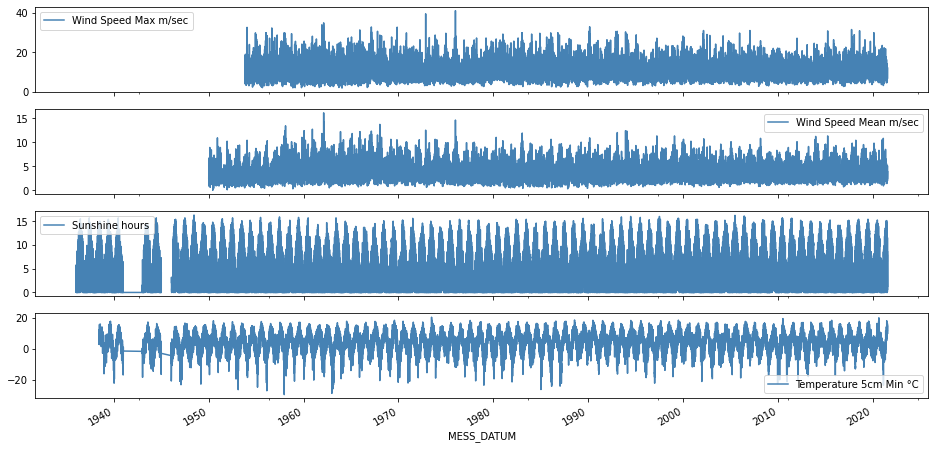

In [14]:
df[['Wind Speed Max m/sec', 'Wind Speed Mean m/sec', 
    'Sunshine hours', 'Temperature 5cm Min °C']].plot(subplots=True, figsize=(16,8),
                                                     color='steelblue')
plt.savefig('Missing data.png', dpi=75, bbox_inches='tight');

By the look of the plots almost all missing values in these columns seem to occur before 1955.

This can be verified roughly by dropping NaN-values from FX so we can see the first date where there are values. Using this date as the first date, NaN-values are substantially reduced although there is still at lease one per column.

In [15]:
display(df['Wind Speed Max m/sec'].dropna().head(1))

MESS_DATUM
1953-11-01    12.5
Name: Wind Speed Max m/sec, dtype: float64

In [16]:
display(df['1953-11-01':].isna().sum().to_frame(name='missing').T)

Wind Speed Max m/sec  Wind Speed Mean m/sec  Rainfall mm  \
missing                    62                     38            0   

         Sunshine hours  Snowfall cm  Cloud Coverage Mean eights  \
missing               1            0                           0   

         Vapour Pressure Mean hpa  Pressure Mean hpa  Temperature Mean °C  \
missing                         0                  0                    0   

         Relative Humidity Mean %  Temperature 2m Max °C  \
missing                         0                      0   

         Temperature 2m Min °C  Temperature 5cm Min °C  
missing                      0                       1

Since there are no missing values in most of the other columns let's leave these alone for the time being.

### Plot temperatures

The three main columns dealing with temperature are:
- TMK: mittlere Tagestemperatur
- TXK: maximale Tagestemperatur
- TNK: minimale Tagestemperatur

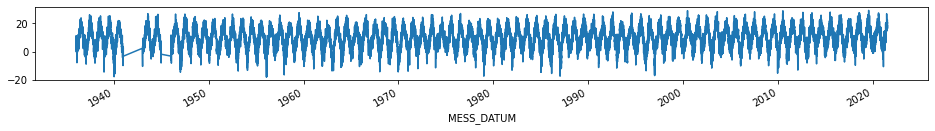

In [17]:
df['Temperature Mean °C'].plot(figsize=(16,1.5));

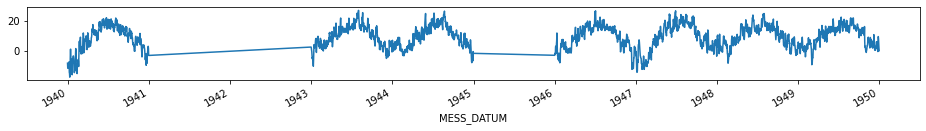

In [18]:
df['1940':'1949']['Temperature Mean °C'].plot(figsize=(16,1.5), subplots=True);

Although the data does not show any missing values there clearly are whole chunks missing from the time series, most notably during WWII.

To keep from distorting statistics let's concentrate on dates starting from January 1st, 1954, the first year that seems to be complete.

In [19]:
df_54_21 = df['1954':].copy()
display(df_54_21.head(1))

Wind Speed Max m/sec  Wind Speed Mean m/sec  Rainfall mm  \
MESS_DATUM                                                             
1954-01-01                   3.9                    1.5          0.0   

            Sunshine hours  Snowfall cm  Cloud Coverage Mean eights  \
MESS_DATUM                                                            
1954-01-01             5.9            1                         5.7   

            Vapour Pressure Mean hpa  Pressure Mean hpa  Temperature Mean °C  \
MESS_DATUM                                                                     
1954-01-01                       4.5             1026.2                 -3.5   

            Relative Humidity Mean %  Temperature 2m Max °C  \
MESS_DATUM                                                    
1954-01-01                      92.0                   -0.1   

            Temperature 2m Min °C  Temperature 5cm Min °C  
MESS_DATUM                                                 
1954-01-01                   -5.5                    -4.1

In [20]:
display(df.asfreq('D').isna().sum().to_frame(name='missing_all').T)
display(df_54_21.asfreq('D').isna().sum().to_frame(name='missing_54').T)

Wind Speed Max m/sec  Wind Speed Mean m/sec  Rainfall mm  \
missing_all                  6576                   5152         1095   

             Sunshine hours  Snowfall cm  Cloud Coverage Mean eights  \
missing_all            1202         1095                        1095   

             Vapour Pressure Mean hpa  Pressure Mean hpa  Temperature Mean °C  \
missing_all                      1095               1095                 1095   

             Relative Humidity Mean %  Temperature 2m Max °C  \
missing_all                      1095                   1095   

             Temperature 2m Min °C  Temperature 5cm Min °C  
missing_all                   1095                    2038

Wind Speed Max m/sec  Wind Speed Mean m/sec  Rainfall mm  \
missing_54                    62                     38            0   

            Sunshine hours  Snowfall cm  Cloud Coverage Mean eights  \
missing_54               1            0                           0   

            Vapour Pressure Mean hpa  Pressure Mean hpa  Temperature Mean °C  \
missing_54                         0                  0                    0   

            Relative Humidity Mean %  Temperature 2m Max °C  \
missing_54                         0                      0   

            Temperature 2m Min °C  Temperature 5cm Min °C  
missing_54                      0                       1

### Get Indexes of Missing data from 1954 onward

In [21]:
miss_index = []
for index, value in df_54_21[df_54_21.isnull().any(axis=1)].iterrows():
    miss_index.append(index.strftime('%d.%m.%Y'))
print(miss_index)
print(len(miss_index))

['16.06.1981', '17.06.1981', '11.08.1981', '12.08.1981', '13.08.1981', '10.09.1981', '11.09.1981', '12.09.1981', '16.09.1981', '17.09.1981', '18.09.1981', '24.09.1981', '25.09.1981', '26.09.1981', '27.09.1981', '28.09.1981', '29.09.1981', '30.09.1981', '01.10.1981', '02.10.1981', '21.10.1981', '01.06.1992', '14.07.1992', '15.07.1992', '19.08.1992', '20.08.1992', '29.01.1995', '02.02.1995', '03.02.1995', '04.02.1995', '05.02.1995', '21.04.1999', '09.06.1999', '22.07.1999', '03.05.2000', '16.08.2000', '15.11.2000', '10.01.2001', '01.04.2001', '02.04.2001', '03.04.2001', '04.04.2001', '05.04.2001', '12.09.2001', '13.09.2001', '14.09.2001', '15.09.2001', '16.09.2001', '17.09.2001', '18.09.2001', '19.09.2001', '01.11.2001', '12.12.2001', '23.01.2002', '24.01.2002', '25.05.2004', '14.08.2004', '15.08.2004', '16.08.2004', '23.01.2005', '04.08.2008', '05.08.2008', '06.08.2008', '25.04.2014', '26.04.2014', '27.04.2014', '28.04.2014', '29.04.2014', '18.05.2014', '13.07.2016', '14.07.2016', '18.0

After reducing the length of the time series and setting the frequency to daily no more missing data can be discovered beyond what we already know about.

### Fill Missing Values

Rather than using bfill or ffill is seems sensible to use interpolation here.

In [22]:
df_54_21.interpolate(axis=1, inplace=True)
df_54_21.fillna(method='bfill', axis=1, inplace=True)
display(df_54_21.asfreq('D').isna().sum().to_frame(name='missing_54').T)

Wind Speed Max m/sec  Wind Speed Mean m/sec  Rainfall mm  \
missing_54                     0                      0            0   

            Sunshine hours  Snowfall cm  Cloud Coverage Mean eights  \
missing_54               0            0                           0   

            Vapour Pressure Mean hpa  Pressure Mean hpa  Temperature Mean °C  \
missing_54                         0                  0                    0   

            Relative Humidity Mean %  Temperature 2m Max °C  \
missing_54                         0                      0   

            Temperature 2m Min °C  Temperature 5cm Min °C  
missing_54                      0                       0

## Outliers

### Boxplots for all columns

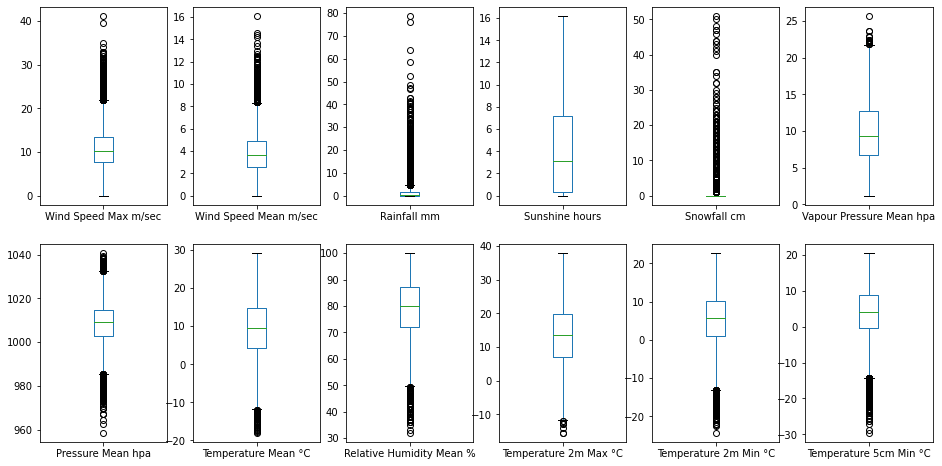

In [23]:
df_54_21.drop(columns='Cloud Coverage Mean eights').plot(kind='box', subplots=True, layout=(2,6), figsize=(16,8));

Conclusion: There are no clear outliers which might be related to errors during measurements or transmittance of data. over a period of more than 65 years there will have been days which have been exceptionally warm, cold, wet or windy.

## Correlation between measurements

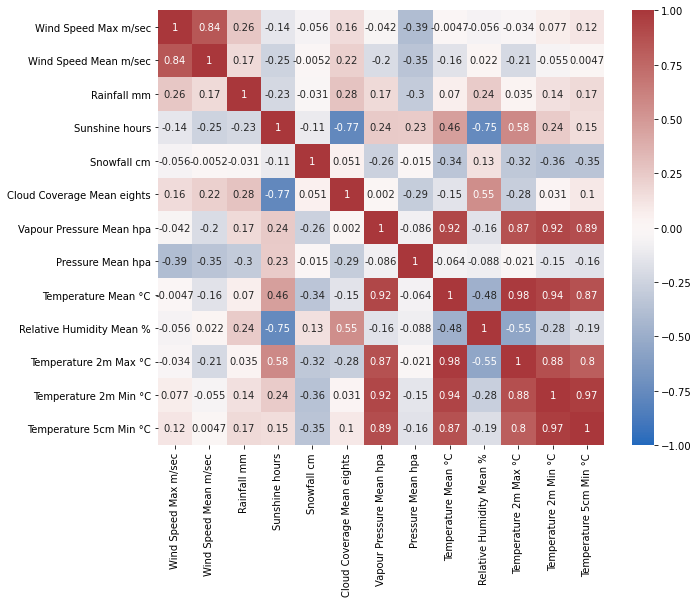

In [24]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df_54_21.corr(), center=0, annot=True, cmap='vlag', vmin=-1, vmax=1, ax=ax)
plt.savefig('heatmap corr.png', dpi=75, bbox_inches='tight');

There do not seem to be any strong correlations between different measurements beyond the obvious ones like temperatures and duration of sunshine vs. humidity.

### Some Scatterplots

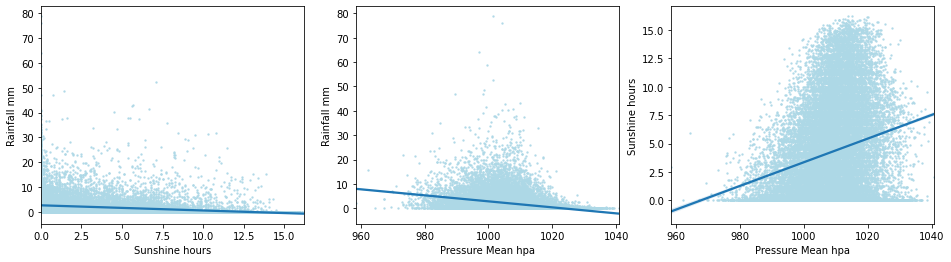

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,4))

sns.regplot(x='Sunshine hours', y='Rainfall mm', data=df_54_21, ax=ax1, 
            scatter_kws={'s':2, 'color':'lightblue'})
sns.regplot(x='Pressure Mean hpa', y='Rainfall mm', data=df_54_21, ax=ax2, 
            scatter_kws={'s':2, 'color':'lightblue'})
sns.regplot(x='Pressure Mean hpa', y='Sunshine hours', data=df_54_21, ax=ax3, 
            scatter_kws={'s':2, 'color':'lightblue'});

## Autocorrelation and Partial Autocorrelation

### Mean Temperature

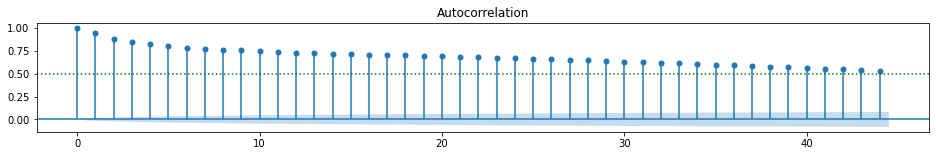

In [26]:
from statsmodels.graphics import tsaplots

plt.rc("figure", figsize=(16, 2))
fig, ax = plt.subplots()
tsaplots.plot_acf(df_54_21['Temperature Mean °C'], ax=ax)
ax.axhline(0.5, ls='dotted', color='green');

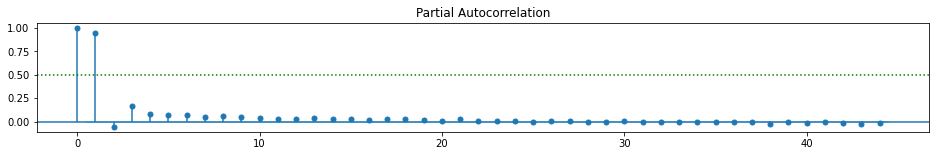

In [27]:
fig, ax = plt.subplots()
tsaplots.plot_pacf(df_54_21['Temperature Mean °C'], ax=ax)
ax.axhline(0.5, ls='dotted', color='green');

Looking at autocorrelation it looks like the temperature can be predicted fairly far into the future easily from the previous values. However, partial correlation finds that this only the case for a lag of one, meaning that only the next day's temperature can be predicted from the previous day's.

### Rainfall

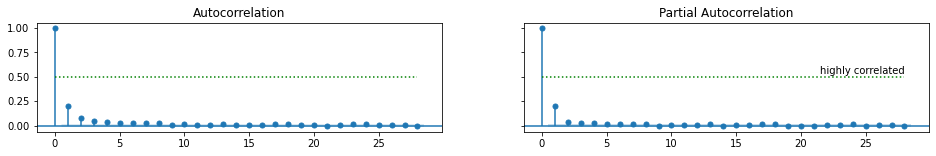

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,2), sharey=True)

tsaplots.plot_acf(df_54_21['Rainfall mm'], lags=28, ax=ax1)
tsaplots.plot_pacf(df_54_21['Rainfall mm'], lags=28, ax=ax2)
for ax in [ax1, ax2]:
    ax.hlines(0.5, 0, 28, ls='dotted', lw=1.5, color='green')
ax2.text(28, 0.525, 'highly correlated', ha='right');

### Air Pressure

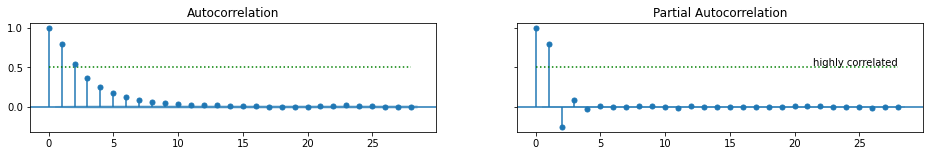

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,2), sharey=True)

tsaplots.plot_acf(df_54_21['Pressure Mean hpa'], lags=28, ax=ax1)
tsaplots.plot_pacf(df_54_21['Pressure Mean hpa'], lags=28, ax=ax2)
for ax in [ax1, ax2]:
    ax.hlines(0.5, 0, 28, ls='dotted', lw=1.5, color='green')
ax2.text(28, 0.525, 'highly correlated', ha='right');

## Seasonality, Trends and Noise

### Mean Temperature, downsampling as mean

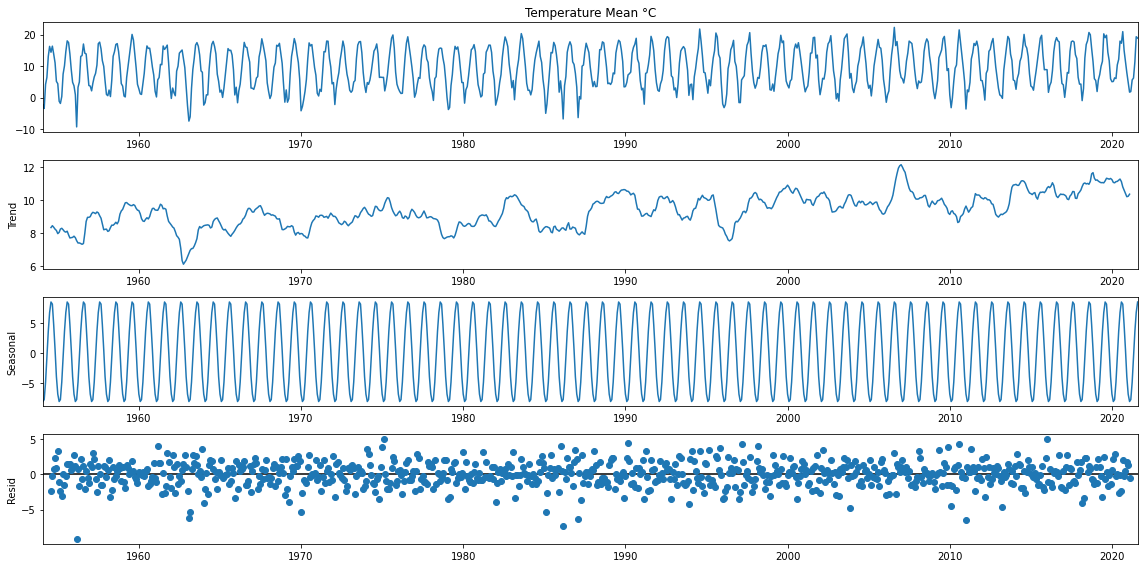

In [30]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df_54_21['Temperature Mean °C'].resample('M').mean())

plt.rc("figure", figsize=(16, 8))
decomposition.plot();

### Rainfall, downsampling as sum

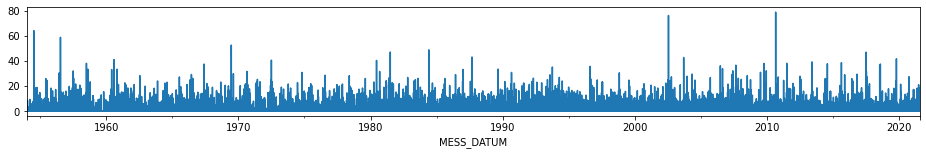

In [31]:
plt.rc("figure", figsize=(16, 2))
df_54_21['Rainfall mm'].plot();

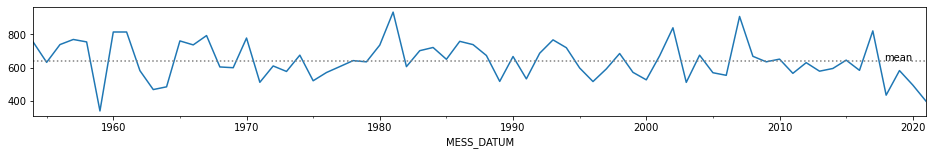

In [32]:
df_rain_Y = df_54_21['Rainfall mm'].resample('Y').sum()
df_rain_Y.plot()
plt.axhline(df_rain_Y.mean(), color='grey', ls='dotted')
plt.text('2020', df_rain_Y.mean(), 'mean', ha='right');

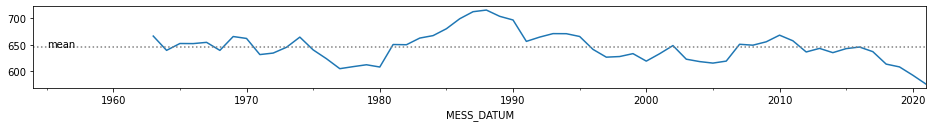

In [33]:
plt.rc("figure", figsize=(16, 1.5))
df_rain_Y.rolling(window=10).mean().plot()
plt.axhline(df_rain_Y.rolling(window=10).mean().mean(), color='grey', ls='dotted')
plt.text('1955', df_rain_Y.rolling(window=10).mean().mean(), 'mean', ha='left');

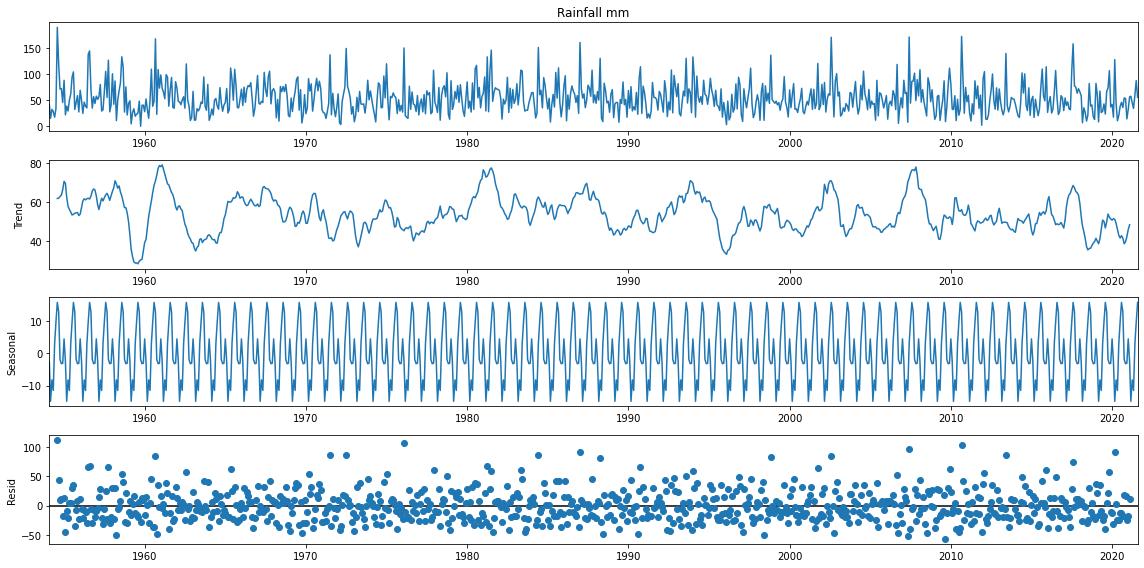

In [34]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df_54_21['Rainfall mm'].resample('M').sum())

plt.rc("figure", figsize=(16, 8))
decomposition.plot();

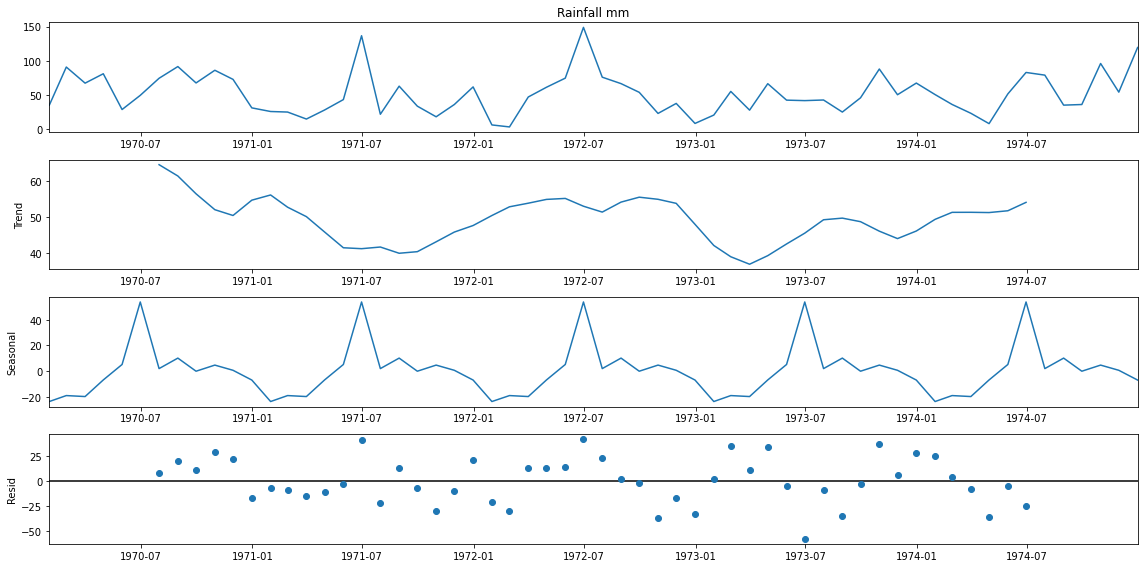

In [35]:
decomposition = sm.tsa.seasonal_decompose(df_54_21['1970':'1974']['Rainfall mm'].resample('M').sum())

plt.rc("figure", figsize=(16, 8))
decomposition.plot();

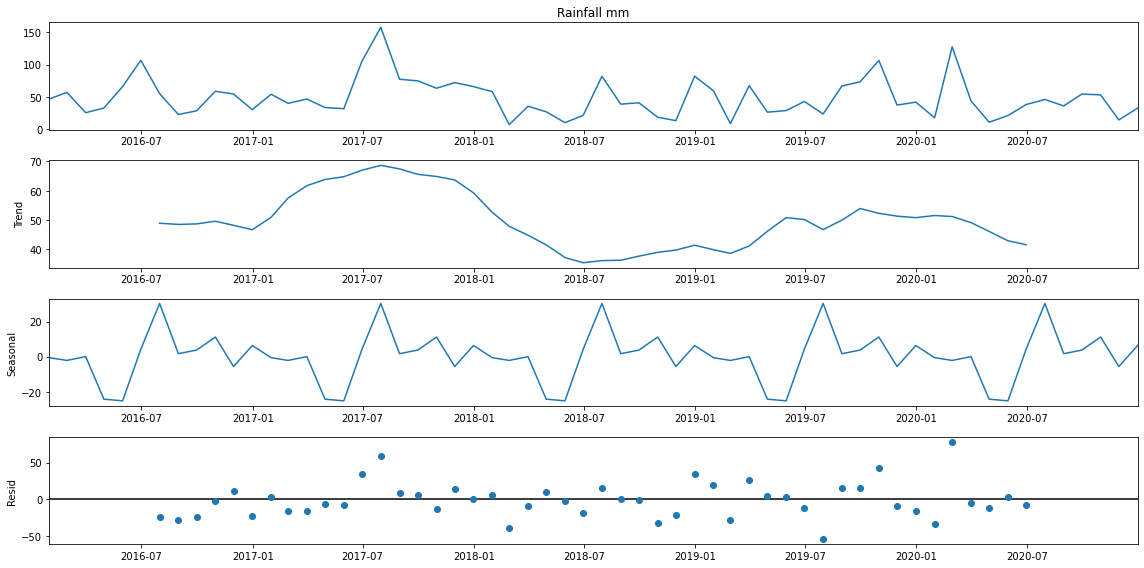

In [36]:
decomposition = sm.tsa.seasonal_decompose(df_54_21['2016':'2020']['Rainfall mm'].resample('M').sum())

plt.rc("figure", figsize=(16, 8))
decomposition.plot();

### Snow, downsampling as sum

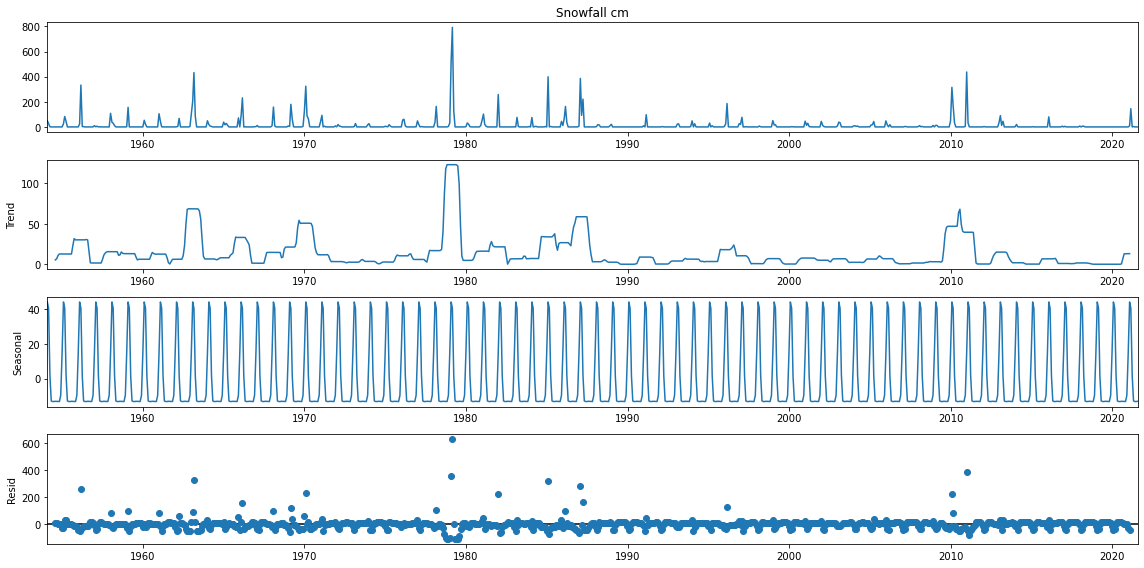

In [37]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df_54_21['Snowfall cm'].resample('M').sum())

plt.rc("figure", figsize=(16, 8))
decomposition.plot();

### Wind Speeds, downsampling as mean

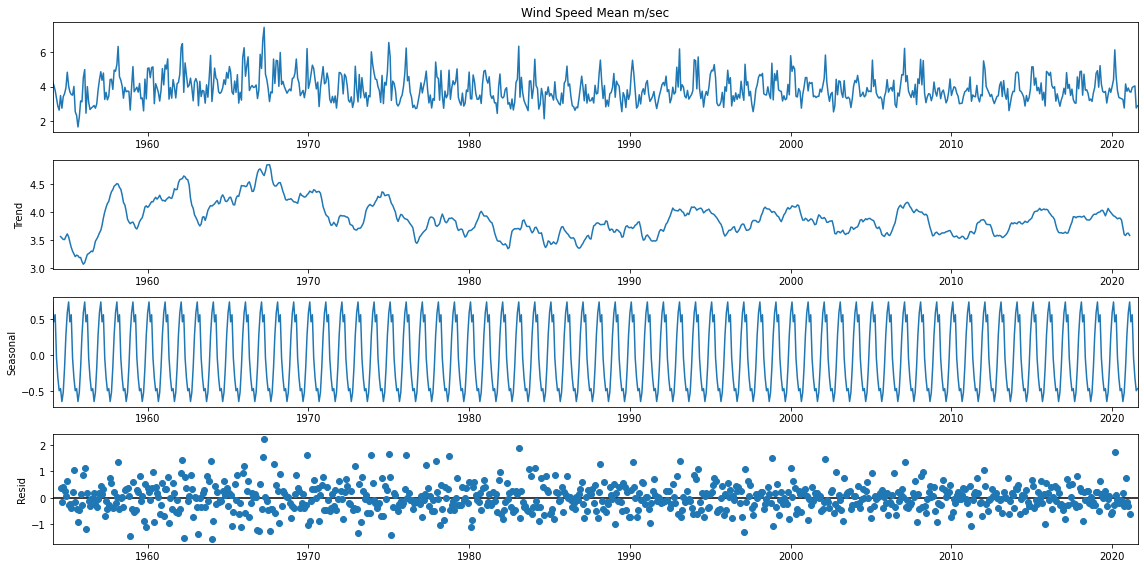

In [38]:
decomposition = sm.tsa.seasonal_decompose(df_54_21['Wind Speed Mean m/sec'].resample('M').mean())

plt.rc("figure", figsize=(16, 8))
decomposition.plot();

### Wind Peaks, no downsampling

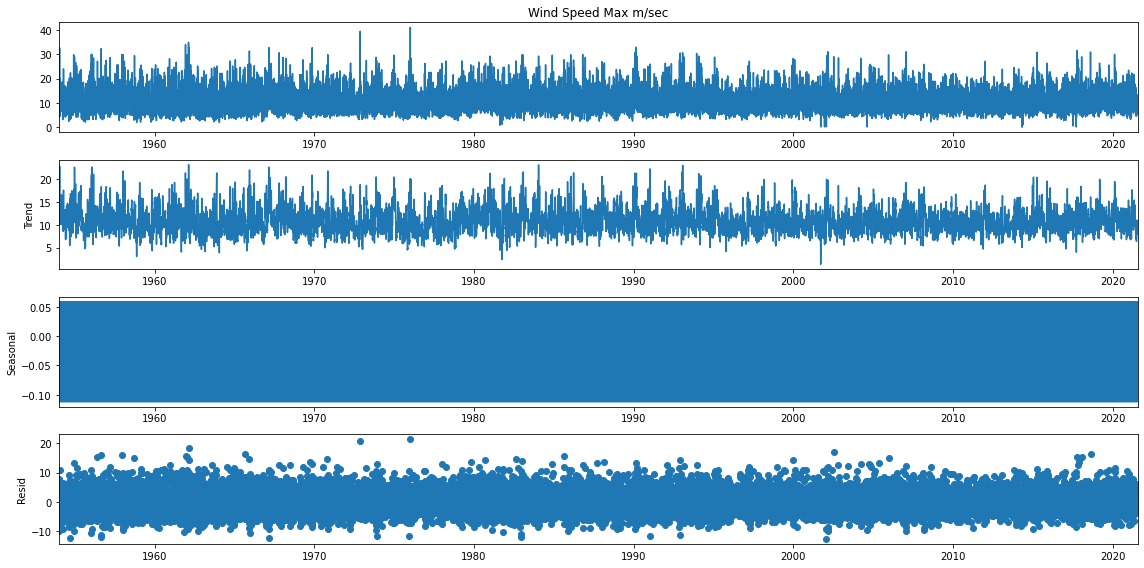

In [39]:
decomposition = sm.tsa.seasonal_decompose(df_54_21['Wind Speed Max m/sec'])

plt.rc("figure", figsize=(16, 8))
decomposition.plot();

### Sunshine, downsampling as mean

MESS_DATUM
2011-12-31    1673.200
2012-12-31    1529.400
2013-12-31    1503.000
2014-12-31    1509.000
2015-12-31    1610.116
2016-12-31    1597.500
2017-12-31    1364.223
2018-12-31    1966.716
2019-12-31    1736.866
2020-12-31    1801.121
2021-12-31     901.481
Freq: A-DEC, Name: Sunshine hours, dtype: float64

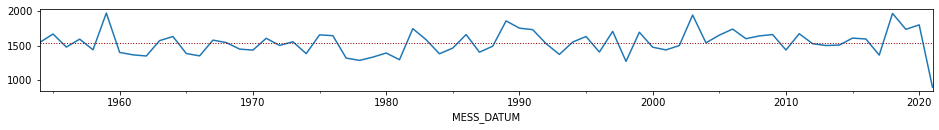

In [40]:
plt.rc("figure", figsize=(16, 1.5))
display(df_54_21['Sunshine hours'].resample('Y').sum().tail(11))
ax = df_54_21['Sunshine hours'].resample('Y').sum().plot()
ax.axhline(df_54_21['Sunshine hours'].resample('Y').sum().mean(), 
           color='darkred', lw=1, ls='dotted');

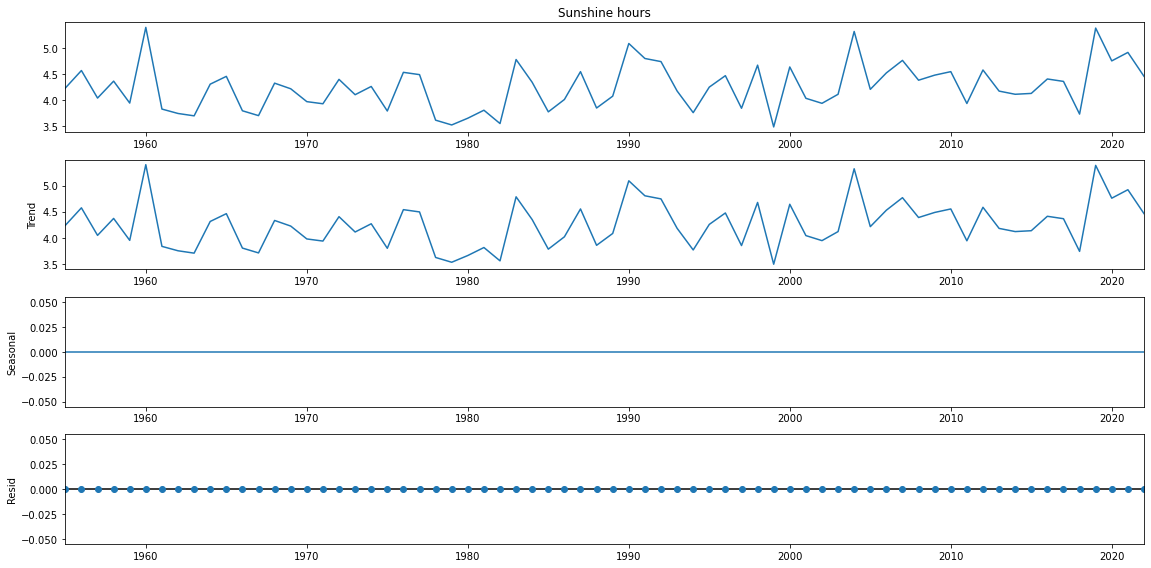

In [41]:
decomposition = sm.tsa.seasonal_decompose(df_54_21['Sunshine hours'].resample('Y').mean())

plt.rc("figure", figsize=(16, 8))
decomposition.plot();

## Rolling averages

### per 4 weeks or 28 days

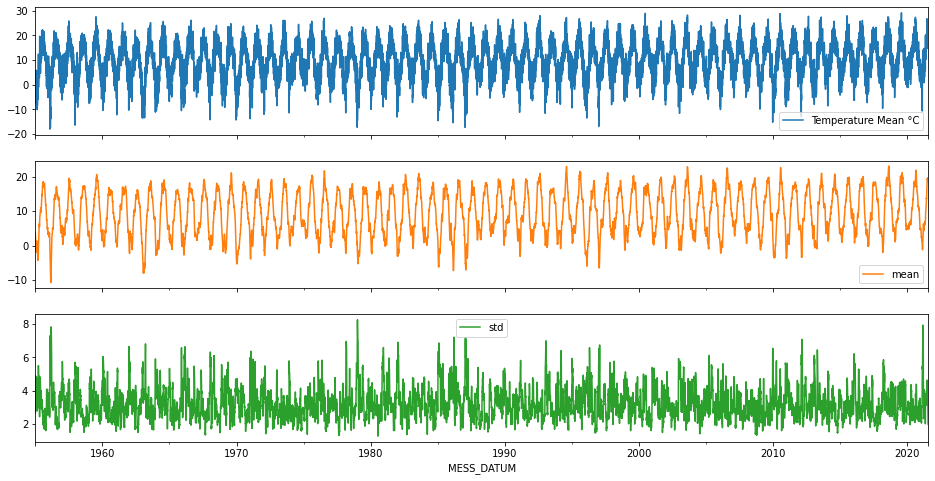

In [42]:
rolling_28_days = df_54_21['Temperature Mean °C'].rolling(window='28D') \
                                                .agg(['mean', 'std'])
statsm = df_54_21.join(rolling_28_days)
statsm = statsm['1955-01-01':]
statsm[['Temperature Mean °C', 'mean', 'std']].dropna().plot(subplots=True)
plt.show()

### per year

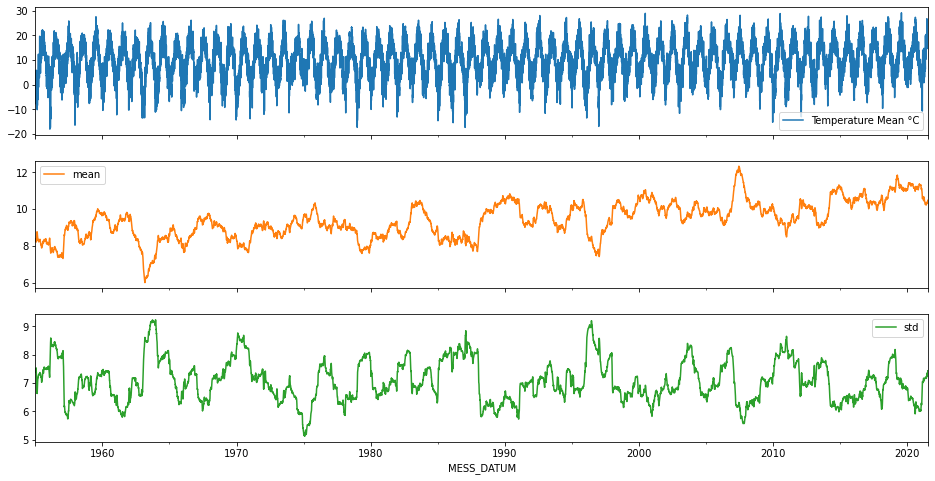

In [43]:
rolling_365_days = df_54_21['Temperature Mean °C'].rolling(window='365D') \
                                                .agg(['mean', 'std'])
statsy = df_54_21.join(rolling_365_days)
statsy = statsy['1955-01-01':]
statsy[['Temperature Mean °C', 'mean', 'std']].dropna().plot(subplots=True)
plt.show()

## Adding Covid-19

https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0/about

### Import and Filter Dataset

In [44]:
df_covid = pd.read_csv('RKI_COVID19_Niedersachsen.csv', parse_dates=['Meldedatum'])
df_covid = df_covid[df_covid['Landkreis'] == 'Region Hannover']
display(df_covid.head(2))

IdBundesland     Bundesland  IdLandkreis        Landkreis Altersgruppe  \
32405             3  Niedersachsen         3241  Region Hannover      A00-A04   
32406             3  Niedersachsen         3241  Region Hannover      A00-A04   

           Altersgruppe2 Geschlecht Meldedatum    Refdatum  \
32405  Nicht übermittelt          M 2020-03-28  2020/03/28   
32406  Nicht übermittelt          M 2020-04-10  2020/04/12   

       IstErkrankungsbeginn  NeuerFall  NeuerTodesfall  NeuGenesen  \
32405                     0          0              -9           0   
32406                     1          0              -9           0   

       AnzahlFall  AnzahlTodesfall  AnzahlGenesen             Datenstand  \
32405           1                0              1  26.07.2021, 00:00 Uhr   
32406           1                0              1  26.07.2021, 00:00 Uhr   

       ObjectId  
32405     32406  
32406     32407

### Group by Date

In [45]:
df_cases = df_covid.groupby('Meldedatum')['AnzahlFall'].sum().to_frame(name='Covid-19 Cases')
display(df_cases.head(2))

Covid-19 Cases
Meldedatum                
2020-03-01               1
2020-03-03               1

### Merge with Weather

In [46]:
df_weather = df['2020-03-01':].merge(df_cases, left_index=True, right_index=True)
display(df_weather.head(2))
display(df_weather.tail(2))

Wind Speed Max m/sec  Wind Speed Mean m/sec  Rainfall mm  \
2020-03-01                  14.6                    6.1          2.9   
2020-03-03                  11.3                    4.2          0.7   

            Sunshine hours  Snowfall cm  Cloud Coverage Mean eights  \
2020-03-01            1.60            0                         5.3   
2020-03-03            5.35            0                         6.2   

            Vapour Pressure Mean hpa  Pressure Mean hpa  Temperature Mean °C  \
2020-03-01                       6.4             986.37                  7.1   
2020-03-03                       7.4             993.30                  5.6   

            Relative Humidity Mean %  Temperature 2m Max °C  \
2020-03-01                     63.83                    9.6   
2020-03-03                     81.96                    9.1   

            Temperature 2m Min °C  Temperature 5cm Min °C  Covid-19 Cases  
2020-03-01                    5.0                     1.3               1  
2020-03-03                    2.0                    -1.5               1

Wind Speed Max m/sec  Wind Speed Mean m/sec  Rainfall mm  \
2021-07-20                   7.9                    2.5          0.0   
2021-07-21                   6.9                    2.1          0.0   

            Sunshine hours  Snowfall cm  Cloud Coverage Mean eights  \
2021-07-20           2.167            0                         7.0   
2021-07-21           1.300            0                         7.1   

            Vapour Pressure Mean hpa  Pressure Mean hpa  Temperature Mean °C  \
2021-07-20                      13.9            1013.85                 17.0   
2021-07-21                      16.1            1015.86                 18.5   

            Relative Humidity Mean %  Temperature 2m Max °C  \
2021-07-20                     72.46                   21.4   
2021-07-21                     76.17                   22.9   

            Temperature 2m Min °C  Temperature 5cm Min °C  Covid-19 Cases  
2021-07-20                   13.7                    13.5              88  
2021-07-21                   15.6                    14.7              78

### Check for Correlation

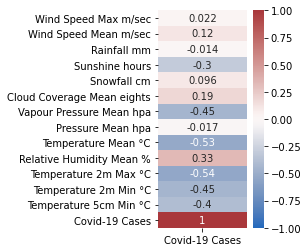

In [47]:
df_cov_corr = df_weather.corr()

fig, ax = plt.subplots(figsize=(2,4))
sns.heatmap(df_cov_corr[['Covid-19 Cases']], annot=True, 
            cmap='vlag', vmin=-1, vmax=1, ax=ax);

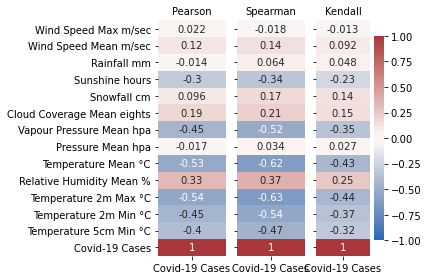

In [48]:
df_pearson = df_weather.corr()
df_spearman = df_weather.corr(method='spearman')
df_kendall = df_weather.corr(method='kendall')

fig, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(6,4))
sns.heatmap(df_pearson[['Covid-19 Cases']], annot=True, cmap='vlag', vmin=-1, vmax=1,
            ax=ax1, cbar=False)
ax1.set_title('Pearson', fontsize=10)
sns.heatmap(df_spearman[['Covid-19 Cases']], annot=True, cmap='vlag', vmin=-1, vmax=1,
            ax=ax2, cbar=False)
ax2.set_title('Spearman', fontsize=10)
sns.heatmap(df_kendall[['Covid-19 Cases']], annot=True, cmap='vlag', vmin=-1, vmax=1,
            ax=ax3)
ax3.set_title('Kendall', fontsize=10)
plt.tight_layout()
plt.savefig('heatmap corr3 covid.png', bbox_inches='tight');

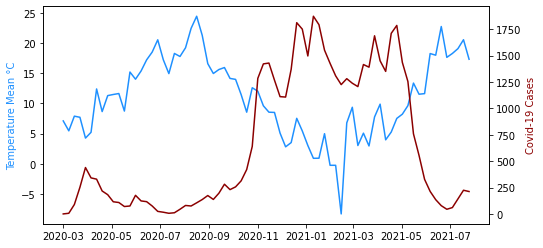

In [49]:
df_weatherw = df_weather.resample('W').mean()
df_weathercw = df_weather.resample('W').sum()

fig, ax = plt.subplots(figsize=(8,4))

ax.plot(df_weatherw.index, df_weatherw['Temperature Mean °C'], color='dodgerblue')
ax2 = ax.twinx()
ax2.plot(df_weathercw.index, df_weathercw['Covid-19 Cases'], color='darkred')
# lns = lns1+lns2
# labs = [l.get_label() for l in lns]
# ax.legend(lns, labs, loc='upper left', frameon=False)
ax.set_ylabel('Temperature Mean °C', color='dodgerblue')
ax2.set_ylabel('Covid-19 Cases', color='darkred')
plt.savefig('temp-cov-line.png');

## Stationarity

### Mean Temperature

In [50]:
temp_mean=df_54_21['Temperature Mean °C'].mean()
print(temp_mean)

9.382540325849071


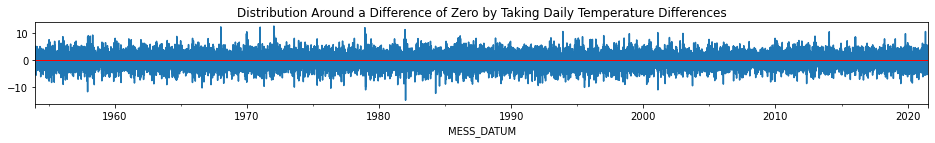

In [51]:
ax = df_54_21['Temperature Mean °C'].diff().plot(figsize=(16,1.5))
ax.axhline(0, color='red', lw=1)
plt.title('Distribution Around a Difference of Zero by Taking Daily Temperature Differences');

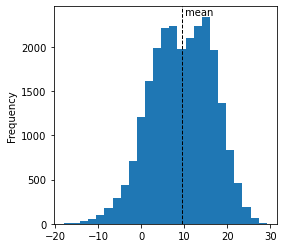

In [52]:
ax = df_54_21['Temperature Mean °C'].plot(kind='hist', bins=25, figsize=(4,4))
ax.axvline(temp_mean, color='black', lw=1, ls='dashed')
ax.text(temp_mean, 2450, ' mean', va='top');

In [53]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(df_54_21['Temperature Mean °C'])

# Print test statistic
print('adf test statistic:', result[0], 'p-value:', result[1], 'critical values:', result[4],
      sep='\n')

adf test statistic:
-11.873222515804743
p-value:
6.430163441714258e-22
critical values:
{'1%': -3.430615583017095, '5%': -2.861657379573812, '10%': -2.566832477728774}


Although a trend towards warmer mean temperatures could be observed, the data itself is considered stationary by the augmented fuller test. The p-value is considerable less than 0.05 and the adf test statistic is also well below the critical values.

In [54]:
result = adfuller(df_54_21['Temperature Mean °C'].diff().dropna())

print('adf test statistic:', result[0], 'p-value:', result[1], 'critical values:', result[4],
      sep='\n')

adf test statistic:
-44.42254239056957
p-value:
0.0
critical values:
{'1%': -3.430615313635065, '5%': -2.8616572605205115, '10%': -2.5668324143592445}


### Rainfall

In [55]:
result = adfuller(df_54_21['Rainfall mm'])

print('adf test statistic:', result[0], 'p-value:', result[1], 'critical values:', result[4],
      sep='\n')

adf test statistic:
-49.5343085844086
p-value:
0.0
critical values:
{'1%': -3.4306151415171677, '5%': -2.861657184453057, '10%': -2.5668323738701635}


### Wind Speeds

In [56]:
result_wmean = adfuller(df_54_21['Wind Speed Mean m/sec'])
result_wmax = adfuller(df_54_21['Wind Speed Max m/sec'])

print('adf test statistic:', result_wmean[0], 'p-value:', result_wmean[1],
      'critical values:', result_wmean[4],
      sep='\n')
print('adf test statistic:', result_wmax[0], 'p-value:', result_wmax[1], 
      'critical values:', result_wmax[4],
      sep='\n')

adf test statistic:
-14.828683484963198
p-value:
1.9140716485365078e-27
critical values:
{'1%': -3.4306155614464036, '5%': -2.8616573700406525, '10%': -2.5668324726544767}
adf test statistic:
-36.447383127178625
p-value:
0.0
critical values:
{'1%': -3.4306151845257027, '5%': -2.8616572034606667, '10%': -2.5668323839875082}


In [57]:
result_wmean = adfuller(df_54_21['Wind Speed Mean m/sec'].diff().dropna())
result_wmax = adfuller(df_54_21['Wind Speed Max m/sec'].diff().dropna())

print('adf test statistic:', result_wmean[0], 'p-value:', result_wmean[1],
      'critical values:', result_wmean[4],
      sep='\n')
print('adf test statistic:', result_wmax[0], 'p-value:', result_wmax[1], 
      'critical values:', result_wmax[4],
      sep='\n')

adf test statistic:
-37.321629679102955
p-value:
0.0
critical values:
{'1%': -3.4306155938037546, '5%': -2.8616573843409725, '10%': -2.566832480266232}
adf test statistic:
-38.252096086847814
p-value:
0.0
critical values:
{'1%': -3.4306155938037546, '5%': -2.8616573843409725, '10%': -2.566832480266232}


In [58]:
print(adfuller(np.sqrt(df_54_21['Wind Speed Mean m/sec'])))

(-14.908664629754373, 1.469732897752888e-27, 47, 24626, {'1%': -3.430615572231311, '5%': -2.861657374807039, '10%': -2.5668324751915224}, 19425.521036836413)


### Covid-19

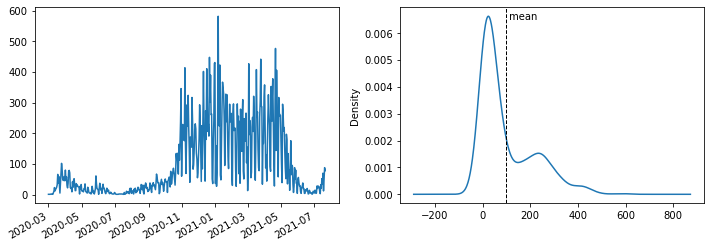

In [59]:
cov_mean = df_weather['Covid-19 Cases'].mean()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
df_weather['Covid-19 Cases'].plot(ax=ax1)
df_weather['Covid-19 Cases'].plot(kind='kde', ax=ax2)
ax2.axvline(cov_mean, color='black', lw=1, ls='dashed')
ax2.text(cov_mean, 0.0065, ' mean');

In [60]:
result = adfuller(df_weather['Covid-19 Cases'])

print('adf test statistic:', result[0], 'p-value:', result[1], 'critical values:', result[4],
      sep='\n')

adf test statistic:
-1.6557841118077148
p-value:
0.4540256122127326
critical values:
{'1%': -3.4439899743408136, '5%': -2.8675550551408353, '10%': -2.569973792117904}


## A Side Issue of Weekdays

### Rainfall

In [61]:
df_54_21['Weekday'] = df_54_21.index.dayofweek
df_54_21['Weekdayname'] = df_54_21.index.day_name()

df_weekdays_54_21 = df_54_21.groupby(['Weekday', 'Weekdayname'])['Rainfall mm'].agg(['sum', 'mean'])
display(df_weekdays_54_21)

sum      mean
Weekday Weekdayname                  
0       Monday       6259.8  1.775830
1       Tuesday      5964.7  1.692113
2       Wednesday    6382.3  1.810582
3       Thursday     6551.7  1.859166
4       Friday       6075.1  1.723433
5       Saturday     5865.6  1.664000
6       Sunday       6563.7  1.862043

In [62]:
df_weekdays_decade = df_54_21['2011':'2021'].groupby(['Weekday', 'Weekdayname'])\
                                                    ['Rainfall mm'].agg(['sum', 'mean'])
display(df_weekdays_decade.sort_values('sum', ascending=False))

sum      mean
Weekday Weekdayname                  
6       Sunday       1029.1  1.867695
3       Thursday      971.9  1.767091
0       Monday        894.6  1.623593
4       Friday        869.4  1.580727
2       Wednesday     867.4  1.574229
5       Saturday      844.9  1.533394
1       Tuesday       843.8  1.531397

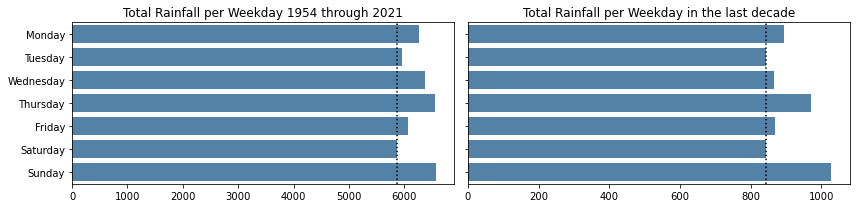

In [63]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,3), sharey=True)

sns.barplot(x='sum', y='Weekdayname', data=df_weekdays_54_21.reset_index(), ax=ax1,
            color='steelblue')
ax1.axvline(df_weekdays_54_21['sum'].min(), color='black', ls='dotted')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Total Rainfall per Weekday 1954 through 2021')
sns.barplot(x='sum', y='Weekdayname', data=df_weekdays_decade.reset_index(), ax=ax2,
            color='steelblue')
ax2.axvline(df_weekdays_decade['sum'].min(), color='black', ls='dotted')
ax2.set_title('Total Rainfall per Weekday in the last decade')
ax2.set_xlabel('')
ax2.set_ylabel('')
plt.tight_layout()
plt.savefig('Rainy Days all and last decade.png', bbox_inches='tight', dpi=75);

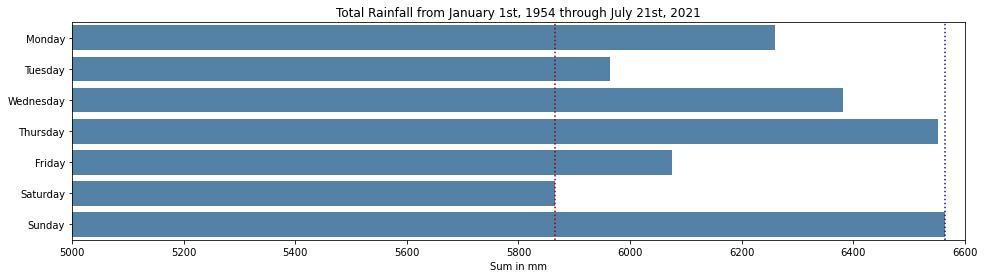

In [64]:
fig, ax = plt.subplots(figsize=(16,4))
sns.barplot(x='sum', y='Weekdayname', data=df_weekdays_54_21.reset_index(), ax=ax,
            color='steelblue')
ax.set_xlim(5000, 6600)
ax.set_xlabel('Sum in mm')
ax.set_ylabel('')
ax.axvline(df_weekdays_54_21['sum'].min(), color='darkred', ls='dotted')
ax.axvline(df_weekdays_54_21['sum'].max(), color='midnightblue', ls='dotted')
ax.set_title('Total Rainfall from January 1st, 1954 through July 21st, 2021')
plt.savefig('Weekday Rainfall min max lines.png', bbox_inches='tight', dpi=75);

### Sunshine

In [65]:
df_weekdays_54_21_S = df_54_21.groupby(['Weekday', 'Weekdayname'])['Sunshine hours'].agg(['sum', 'mean'])
display(df_weekdays_54_21_S)

sum      mean
Weekday Weekdayname                     
0       Monday       15076.334  4.276974
1       Tuesday      15211.567  4.315338
2       Wednesday    15010.966  4.258430
3       Thursday     14945.996  4.241202
4       Friday       14648.189  4.155515
5       Saturday     14854.339  4.213997
6       Sunday       15137.632  4.294364

In [66]:
df_weekdays_decade_S = df_54_21['2011':'2021'].groupby(['Weekday', 'Weekdayname'])\
                                                    ['Sunshine hours'].agg(['sum', 'mean'])
display(df_weekdays_decade_S)

sum      mean
Weekday Weekdayname                    
0       Monday       2576.434  4.675924
1       Tuesday      2390.567  4.338597
2       Wednesday    2482.666  4.505746
3       Thursday     2387.596  4.341084
4       Friday       2415.689  4.392162
5       Saturday     2437.939  4.424572
6       Sunday       2501.732  4.540348

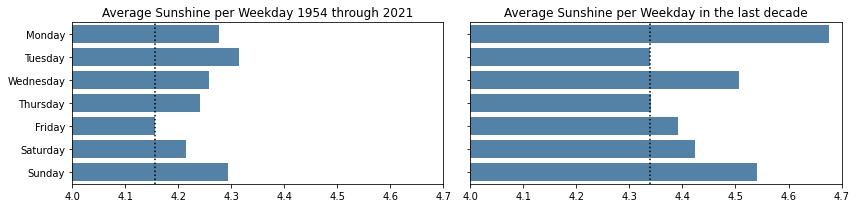

In [67]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,3), sharey=True)

sns.barplot(x='mean', y='Weekdayname', data=df_weekdays_54_21_S.reset_index(), ax=ax1,
            color='steelblue')
ax1.axvline(df_weekdays_54_21_S['mean'].min(), color='black', ls='dotted')
ax1.set_xlabel('')
ax1.set_xlim(4, 4.7)
ax1.set_ylabel('')
ax1.set_title('Average Sunshine per Weekday 1954 through 2021')
sns.barplot(x='mean', y='Weekdayname', data=df_weekdays_decade_S.reset_index(), ax=ax2,
            color='steelblue')
ax2.axvline(df_weekdays_decade_S['mean'].min(), color='black', ls='dotted')
ax2.set_title('Average Sunshine per Weekday in the last decade')
ax2.set_xlabel('')
ax2.set_xlim(4, 4.7)
ax2.set_ylabel('')
plt.tight_layout()
plt.savefig('Sunshine all and last decade.png', bbox_inches='tight');

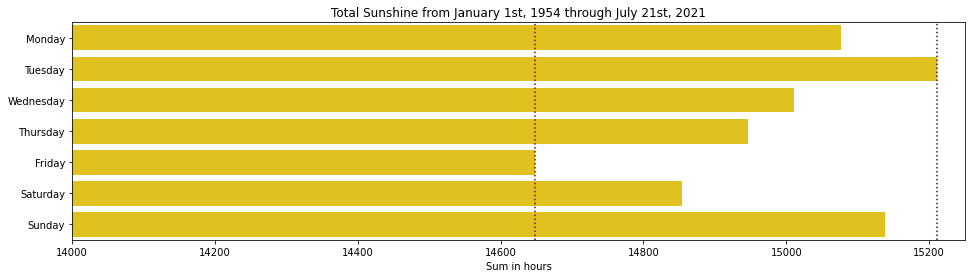

In [68]:
fig, ax = plt.subplots(figsize=(16,4))
sns.barplot(x='sum', y='Weekdayname', data=df_weekdays_54_21_S.reset_index(), ax=ax,
            color='gold')
ax.set_xlim(14000, 15250)
ax.set_xlabel('Sum in hours')
ax.set_ylabel('')
ax.axvline(df_weekdays_54_21_S['sum'].min(), color='darkred', ls='dotted')
ax.axvline(df_weekdays_54_21_S['sum'].max(), color='midnightblue', ls='dotted')
ax.set_title('Total Sunshine from January 1st, 1954 through July 21st, 2021')
plt.savefig('Weekday Sunshine min max lines.png', bbox_inches='tight', dpi=75);

### Mean Temperature

In [69]:
df_weekdays_54_21_T = df_54_21.groupby(['Weekday', 'Weekdayname'])['Temperature Mean °C'].agg(['sum', 'mean'])
display(df_weekdays_54_21_T)

sum      mean
Weekday Weekdayname                   
0       Monday       33280.1  9.441163
1       Tuesday      33157.5  9.406383
2       Wednesday    33014.1  9.365702
3       Thursday     32984.5  9.359960
4       Friday       32985.7  9.357645
5       Saturday     32970.4  9.353305
6       Sunday       33112.5  9.393617

In [70]:
df_weekdays_decade_T = df_54_21['2011':'2021'].groupby(['Weekday', 'Weekdayname'])\
                                                    ['Temperature Mean °C'].agg(['sum', 'mean'])
display(df_weekdays_decade_T)

sum       mean
Weekday Weekdayname                   
0       Monday       5781.9  10.493466
1       Tuesday      5749.9  10.435390
2       Wednesday    5810.1  10.544646
3       Thursday     5825.0  10.590909
4       Friday       5762.8  10.477818
5       Saturday     5727.4  10.394555
6       Sunday       5761.0  10.455535

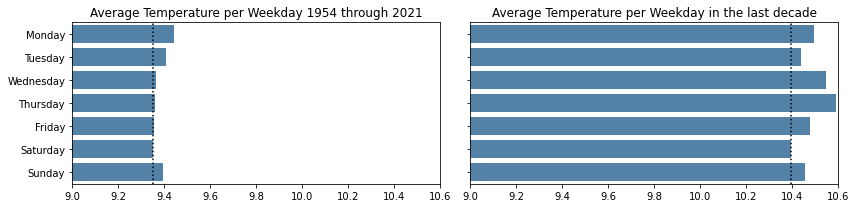

In [71]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,3), sharey=True)

sns.barplot(x='mean', y='Weekdayname', data=df_weekdays_54_21_T.reset_index(), ax=ax1,
            color='steelblue')
ax1.axvline(df_weekdays_54_21_T['mean'].min(), color='black', ls='dotted')
ax1.set_xlabel('')
ax1.set_xlim(9, 10.6)
ax1.set_ylabel('')
ax1.set_title('Average Temperature per Weekday 1954 through 2021')
sns.barplot(x='mean', y='Weekdayname', data=df_weekdays_decade_T.reset_index(), ax=ax2,
            color='steelblue')
ax2.axvline(df_weekdays_decade_T['mean'].min(), color='black', ls='dotted')
ax2.set_title('Average Temperature per Weekday in the last decade')
ax2.set_xlabel('')
ax2.set_xlim(9, 10.6)
ax2.set_ylabel('')
plt.tight_layout()
plt.savefig('Sunshine all and last decade.png', bbox_inches='tight');

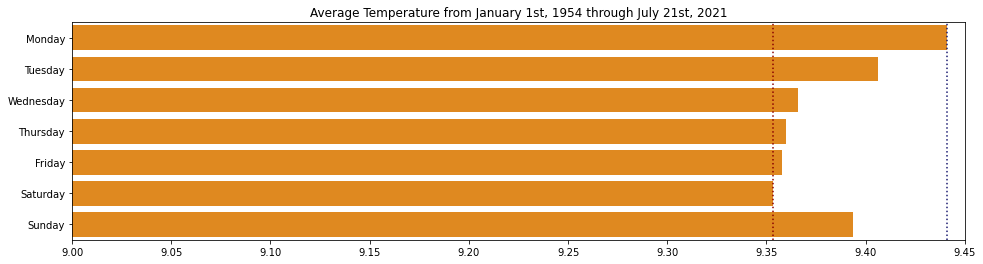

In [72]:
fig, ax = plt.subplots(figsize=(16,4))
sns.barplot(x='mean', y='Weekdayname', data=df_weekdays_54_21_T.reset_index(), ax=ax,
            color='darkorange')
ax.set_xlim(9, 9.45)
ax.set_xlabel('')
ax.set_ylabel('')
ax.axvline(df_weekdays_54_21_T['mean'].min(), color='darkred', ls='dotted')
ax.axvline(df_weekdays_54_21_T['mean'].max(), color='midnightblue', ls='dotted')
ax.set_title('Average Temperature from January 1st, 1954 through July 21st, 2021')
plt.savefig('Weekday Temperature min max lines.png', bbox_inches='tight', dpi=75);

### drop additional columns again

In [73]:
print(df_54_21.columns)
df_54_21.drop(columns=['Weekday', 'Weekdayname'], inplace=True)
print(df_54_21.columns)

Index(['Wind Speed Max m/sec', 'Wind Speed Mean m/sec', 'Rainfall mm',
       'Sunshine hours', 'Snowfall cm', 'Cloud Coverage Mean eights',
       'Vapour Pressure Mean hpa', 'Pressure Mean hpa', 'Temperature Mean °C',
       'Relative Humidity Mean %', 'Temperature 2m Max °C',
       'Temperature 2m Min °C', 'Temperature 5cm Min °C', 'Weekday',
       'Weekdayname'],
      dtype='object')
Index(['Wind Speed Max m/sec', 'Wind Speed Mean m/sec', 'Rainfall mm',
       'Sunshine hours', 'Snowfall cm', 'Cloud Coverage Mean eights',
       'Vapour Pressure Mean hpa', 'Pressure Mean hpa', 'Temperature Mean °C',
       'Relative Humidity Mean %', 'Temperature 2m Max °C',
       'Temperature 2m Min °C', 'Temperature 5cm Min °C'],
      dtype='object')


## ARMA Models

### Mean Temperature

In [74]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

# Instantiate the model
model_ARMA17 = ARMA(df_54_21['Temperature Mean °C'], order=(1, 7), freq='D')

# Fit the model
results_ARMA17 = model_ARMA17.fit()

# Print summary
print(results_ARMA17.summary())

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                               ARMA Model Results                              
Dep. Variable:     Temperature Mean °C   No. Observations:                24674
Model:                      ARMA(1, 7)   Log Likelihood              -55512.502
Method:                        css-mle   S.D. of innovations              2.295
Date:                 Sun, 10 Oct 2021   AIC                         111045.005
Time:                         13:32:28   BIC                         111126.140
Sample:                     01-01-1954   HQIC                        111071.282
                          - 07-21-2021                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         9.3730      0.604     15.519      0.000       8.189      10.557
ar.L1.Temperature Mean °C     0.9905      0.001    960.082      0.000       0.

In [75]:
# Generate predictions
# error: AttributeError: 'ARMAResults' object has no attribute 'get_prediction'
# one_step_forecast = results.get_prediction(start=-30)

# # Extract prediction mean
# mean_forecast = one_step_forecast.predicted_mean

# # Get confidence intervals of  predictions
# confidence_intervals = one_step_forecast.conf_int()

# # Select lower and upper confidence limits
# lower_limits = confidence_intervals.loc[:,'lower close']
# upper_limits = confidence_intervals.loc[:,'upper close']

# # Print best estimate  predictions
# print(mean_forecast)

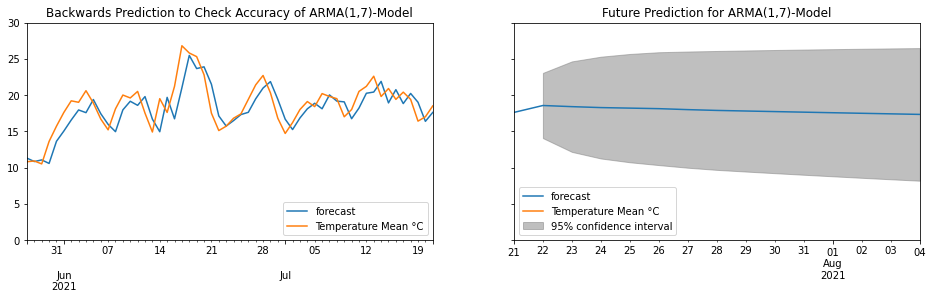

In [76]:
predictions_ARMA17 = results_ARMA17.predict(start='2021-07-21', end='2021-08-04')
fig, ax = plt.subplots(1,2, figsize=(16,4), sharey=True)
results_ARMA17.plot_predict(start=-56, ax=ax[0])
ax[0].set_ylim(0,30)
ax[0].legend(loc='lower right')
ax[0].set_title('Backwards Prediction to Check Accuracy of ARMA(1,7)-Model')
results_ARMA17.plot_predict(start='2021-07-21', end='2021-08-04', ax=ax[1])
ax[1].set_title('Future Prediction for ARMA(1,7)-Model')
ax[1].legend(loc='lower left')
plt.savefig('Predictions Mean Temp AR1MA7.png', bbox_inches='tight');

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                               ARMA Model Results                              
Dep. Variable:     Temperature Mean °C   No. Observations:                24674
Model:                      ARMA(1, 0)   Log Likelihood              -56288.465
Method:                        css-mle   S.D. of innovations              2.369
Date:                 Sun, 10 Oct 2021   AIC                         112582.929
Time:                         13:32:48   BIC                         112607.270
Sample:                     01-01-1954   HQIC                        112590.813
                          - 07-21-2021                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         9.3800      0.269     34.827      0.000       8.852       9.908
ar.L1.Temperature Mean °C     0.9441      0.002    449.545      0.000       0.

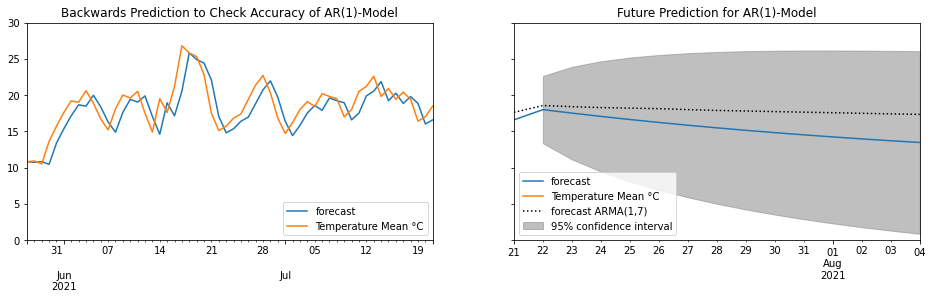

In [77]:
model_AR1 = ARMA(df_54_21['Temperature Mean °C'], order=(1, 0), freq='D')
results_AR1 = model_AR1.fit()
print(results_AR1.summary())
predictions_AR1 = results_AR1.predict(start='2021-07-21', end='2021-08-04')
fig, ax = plt.subplots(1,2, figsize=(16,4), sharey=True)
results_AR1.plot_predict(start=-56, ax=ax[0])
ax[0].set_ylim(0,30)
ax[0].legend(loc='lower right')
ax[0].set_title('Backwards Prediction to Check Accuracy of AR(1)-Model')
results_AR1.plot_predict(start='2021-07-21', end='2021-08-04', ax=ax[1])
predictions_ARMA17.plot(ax=ax[1], lw=1.5, ls='dotted', color='black',
                        label='forecast ARMA(1,7)')
ax[1].set_title('Future Prediction for AR(1)-Model')
ax[1].legend(loc='lower left')
plt.savefig('Predictions Mean Temp AR1.png', bbox_inches='tight');

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                               ARMA Model Results                              
Dep. Variable:     Temperature Mean °C   No. Observations:                24674
Model:                      ARMA(1, 7)   Log Likelihood              -54337.672
Method:                        css-mle   S.D. of innovations              2.189
Date:                 Sun, 10 Oct 2021   AIC                         108697.345
Time:                         13:33:20   BIC                         108786.593
Sample:                     01-01-1954   HQIC                        108726.250
                          - 07-21-2021                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        15.5746      0.581     26.787      0.000      14.435      16.714
Relative Humidity Mean %     -0.0786      0.002    -49.703      0.000      -0.

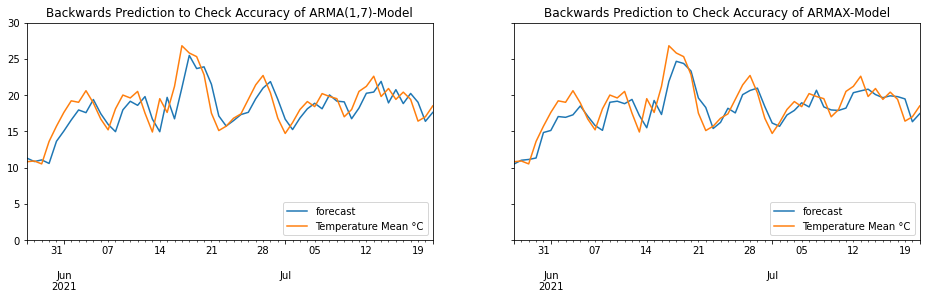

In [78]:
model_exo = ARMA(df_54_21['Temperature Mean °C'], order=(1, 7), 
             exog=df_54_21['Relative Humidity Mean %'], freq='D')
results_exo = model_exo.fit()
print(results_exo.summary())
fig, ax = plt.subplots(1,2, figsize=(16,4), sharey=True)
results_ARMA17.plot_predict(start=-56, ax=ax[0])
ax[0].set_ylim(0,30)
ax[0].legend(loc='lower right')
ax[0].set_title('Backwards Prediction to Check Accuracy of ARMA(1,7)-Model')
results_exo.plot_predict(start=-56, ax=ax[1], exog=df_54_21['Relative Humidity Mean %'])
ax[1].set_ylim(0,30)
ax[1].legend(loc='lower right')
ax[1].set_title('Backwards Prediction to Check Accuracy of ARMAX-Model')
plt.savefig('Predictions Mean Temp Exog.png', bbox_inches='tight');

### Air Pressure

In [79]:
# Check for stationarity

# Run test
result = adfuller(df_54_21['Pressure Mean hpa'])

# Print test statistic
print('adf test statistic:', result[0], 'p-value:', result[1], 'critical values:', result[4],
      sep='\n')

adf test statistic:
-52.88157116195691
p-value:
0.0
critical values:
{'1%': -3.430615098522581, '5%': -2.861657165451611, '10%': -2.5668323637561}


/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:      Pressure Mean hpa   No. Observations:                24674
Model:                     ARMA(1, 2)   Log Likelihood              -76913.926
Method:                       css-mle   S.D. of innovations              5.464
Date:                Sun, 10 Oct 2021   AIC                         153837.852
Time:                        13:33:55   BIC                         153878.419
Sample:                    01-01-1954   HQIC                        153850.990
                         - 07-21-2021                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1008.6514      0.147   6865.620      0.000    1008.363    1008.939
ar.L1.Pressure Mean hpa     0.6803      0.008     82.372      0.000       0.664       0.696


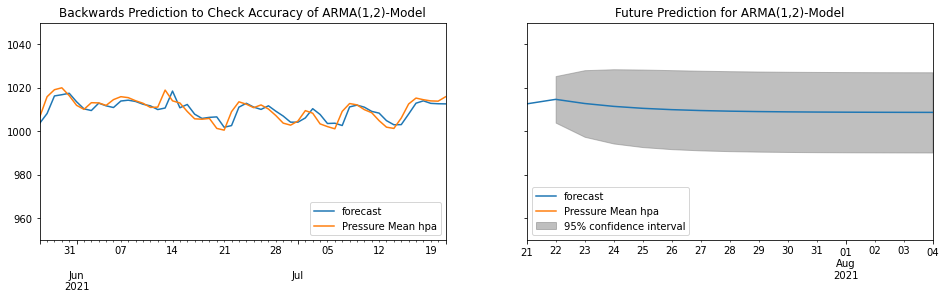

In [80]:
model_ARMA12 = ARMA(df_54_21['Pressure Mean hpa'], order=(1, 2), freq='D')
results_ARMA12 = model_ARMA12.fit()
print(results_ARMA12.summary())
predictions_ARMA12 = results_ARMA12.predict(start='2021-07-21', end='2021-08-04')
fig, ax = plt.subplots(1,2, figsize=(16,4), sharey=True)
results_ARMA12.plot_predict(start=-56, ax=ax[0])
ax[0].set_ylim(950,1050)
ax[0].legend(loc='lower right')
ax[0].set_title('Backwards Prediction to Check Accuracy of ARMA(1,2)-Model')
results_ARMA12.plot_predict(start='2021-07-21', end='2021-08-04', ax=ax[1])
ax[1].set_title('Future Prediction for ARMA(1,2)-Model')
ax[1].legend(loc='lower left')
plt.savefig('Predictions Mean Temp ARMA12.png', bbox_inches='tight');

### Rainfall

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                              ARMA Model Results                              
Dep. Variable:            Rainfall mm   No. Observations:                24674
Model:                     ARMA(1, 1)   Log Likelihood              -67659.215
Method:                       css-mle   S.D. of innovations              3.755
Date:                Sun, 10 Oct 2021   AIC                         135326.430
Time:                        13:34:09   BIC                         135358.884
Sample:                    01-01-1954   HQIC                        135336.941
                         - 07-21-2021                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.7695      0.032     55.465      0.000       1.707       1.832
ar.L1.Rainfall mm     0.4409      0.032     13.945      0.000       0.379       0.503
ma.L1.Rainfall mm    -0.

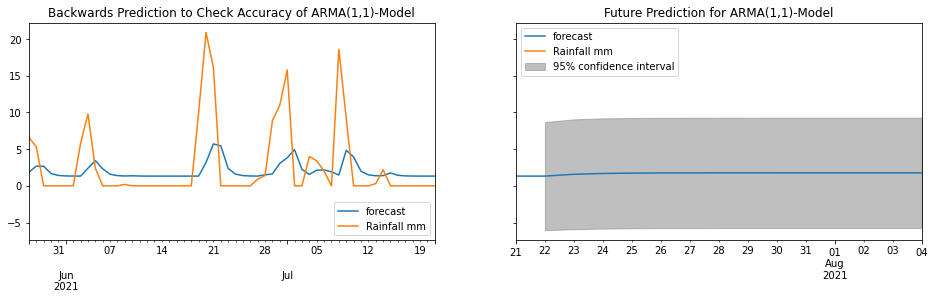

In [81]:
model_ARMA11 = ARMA(df_54_21['Rainfall mm'], order=(1, 1), freq='D')
results_ARMA11 = model_ARMA11.fit()
print(results_ARMA11.summary())
predictions_ARMA11 = results_ARMA11.predict(start='2021-07-21', end='2021-08-04')
fig, ax = plt.subplots(1,2, figsize=(16,4), sharey=True)
results_ARMA11.plot_predict(start=-56, ax=ax[0])
ax[0].legend(loc='lower right')
ax[0].set_title('Backwards Prediction to Check Accuracy of ARMA(1,1)-Model')
results_ARMA11.plot_predict(start='2021-07-21', end='2021-08-04', ax=ax[1])
ax[1].set_title('Future Prediction for ARMA(1,1)-Model')
ax[1].legend(loc='upper left')
plt.savefig('Predictions Mean Temp ARMA11.png', bbox_inches='tight');

### Best p and q for ARMA(p,q)

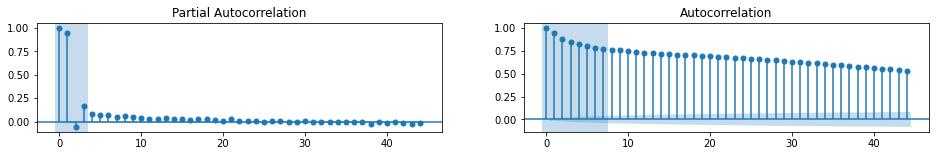

In [82]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,2))
tsaplots.plot_pacf(df_54_21['Temperature Mean °C'], ax=ax1)
ax1.axvspan(-0.5,3.5, alpha=0.25)
tsaplots.plot_acf(df_54_21['Temperature Mean °C'], ax=ax2)
ax2.axvspan(-0.5,7.5, alpha=0.25)
plt.savefig('Partial_Auto_Mean_Temp.png', bbox_inches='tight');

In [83]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-3
for p in range(4):
  # Loop over q values from 0-7
    for q in range(8):
      	# create and fit ARMA(p,q) model
        try:
            model = ARMA(df_54_21['Temperature Mean °C'], order=(p, q), freq='D')
            results = model.fit()

            # Append order and results tuple
            order_aic_bic.append((p, q, results.aic, results.bic))
            print(p, q, 'done', end='   ')
            
        except:
            print(p, q, 'skipped', end='   ')

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


0 0 done   0 1 done   0 2 done   0 3 done   0 4 done   0 5 done   0 6 done   0 7 done   1 0 done   1 1 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


1 2 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


1 3 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


1 4 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


1 5 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


1 6 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


1 7 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


2 0 done   2 1 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


2 2 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


2 3 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


2 4 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


2 5 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


2 6 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


2 7 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


3 0 done   3 1 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


3 2 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


3 3 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


3 4 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


3 5 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


3 6 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encou

3 7 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [84]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic, columns=['AR(p)', 'MA(q)', 'AIC', 'BIC'])
order_df.iloc[31, 2] = np.nan
order_df.iloc[31, 3] = np.nan
order_df.iloc[30, 2] = np.nan
order_df.iloc[30, 3] = np.nan
order_df.set_index(['AR(p)', 'MA(q)'], inplace=True)

# Print order_df in order of increasing BIC
display(order_df.sort_values('BIC').head(2))
display(order_df.sort_values('BIC').tail(4))

AIC            BIC
AR(p) MA(q)                              
2     2      111030.275870  111078.956902
      3      111031.297842  111088.092380

AIC            BIC
AR(p) MA(q)                              
0     1      142700.377195  142724.717711
      0      167295.954760  167312.181770
3     6                NaN            NaN
      7                NaN            NaN

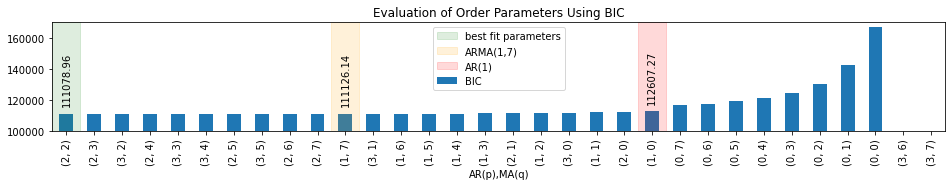

In [85]:
fig, ax = plt.subplots(figsize=(16,2))
order_df.sort_values('BIC')['BIC'].plot(kind='bar')
ax.set_ylim(100000, 170000)
for bar in ax.patches:
    x = bar.get_x()
    height = bar.get_height()
    if x in (-0.25, 9.75, 20.75):
        ax.text(x + bar.get_width()/2, height + 5000, round(height, 2), 
                va = 'bottom', ha='center', rotation=90)
ax.axvspan(-0.5, 0.5, color='forestgreen', alpha=0.15, label='best fit parameters')
ax.axvspan(9.5, 10.5, color='orange', alpha=0.15, label='ARMA(1,7)')
ax.axvspan(20.5, 21.5, color='red', alpha=0.15, label='AR(1)')
ax.legend()
ax.set_title('Evaluation of Order Parameters Using BIC')
plt.savefig('Evaluation Order Params.png', bbox_inches='tight');

### Modelling Best Model using ARIMA

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                               ARMA Model Results                              
Dep. Variable:     Temperature Mean °C   No. Observations:                24674
Model:                      ARMA(2, 2)   Log Likelihood              -55509.138
Method:                        css-mle   S.D. of innovations              2.295
Date:                 Sun, 10 Oct 2021   AIC                         111030.276
Time:                         13:51:16   BIC                         111078.957
Sample:                     01-01-1954   HQIC                        111046.042
                          - 07-21-2021                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         9.3729      0.617     15.186      0.000       8.163      10.583
ar.L1.Temperature Mean °C     1.5939      0.012    135.759      0.000       1.

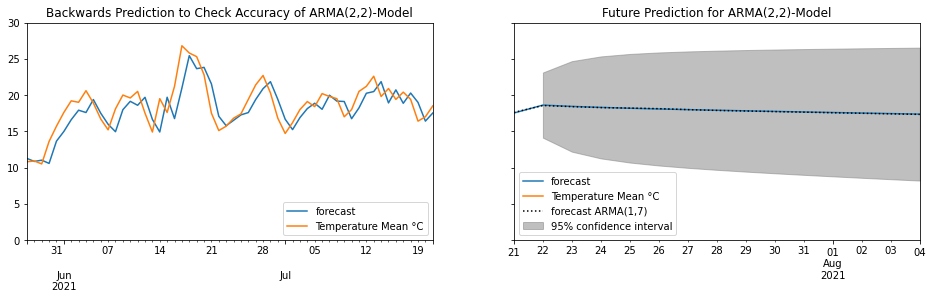

In [86]:
model_ARMA22 = ARMA(df_54_21['Temperature Mean °C'], order=(2, 2), freq='D')
results_ARMA22 = model_ARMA22.fit()
print(results_ARMA22.summary())
predictions_ARMA22 = results_ARMA22.predict(start='2021-07-21', end='2021-08-04')
fig, ax = plt.subplots(1,2, figsize=(16,4), sharey=True)
results_ARMA22.plot_predict(start=-56, ax=ax[0])
ax[0].set_ylim(0,30)
ax[0].legend(loc='lower right')
ax[0].set_title('Backwards Prediction to Check Accuracy of ARMA(2,2)-Model')
results_ARMA22.plot_predict(start='2021-07-21', end='2021-08-04', ax=ax[1])
predictions_ARMA17.plot(ax=ax[1], lw=1.5, ls='dotted', color='black',
                        label='forecast ARMA(1,7)')
ax[1].set_title('Future Prediction for ARMA(2,2)-Model')
ax[1].legend(loc='lower left')
plt.savefig('Predictions Mean Temp ARMA22.png', bbox_inches='tight');

### Residuals

In [87]:
print(results_ARMA22.resid.sort_values())

MESS_DATUM
1982-01-06   -13.398244
1954-01-01   -12.872901
1957-12-16   -12.425997
1984-04-16   -10.567355
1962-12-22   -10.363234
                ...    
1968-01-14     9.596467
1978-12-09    10.023164
2021-05-09    10.293271
1972-01-19    10.392034
1971-01-07    10.552782
Length: 24674, dtype: float64


/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

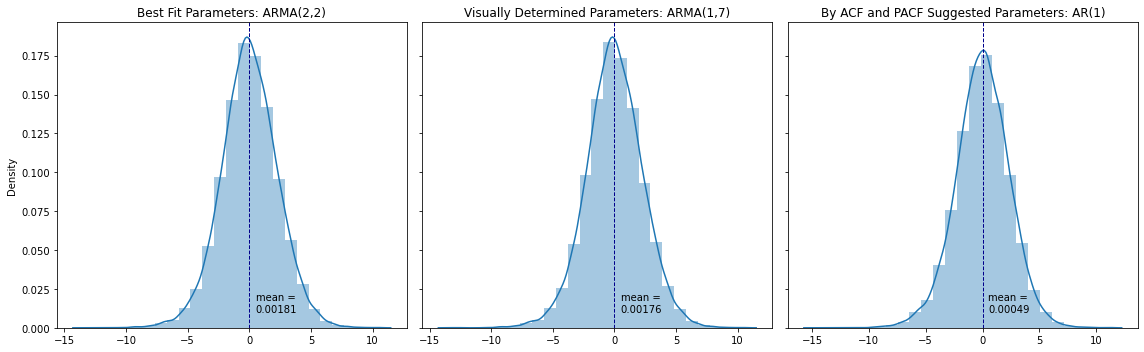

In [88]:
fig.clear()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,5), sharey=True)
# ARMA(2,2)
sns.distplot(results_ARMA22.resid, bins=25, ax=ax1)
ARMA22_mean = results_ARMA22.resid.mean()
ax1.axvline(ARMA22_mean, lw=1, ls='dashed', color='darkblue')
ax1.text(ARMA22_mean + 0.5, 0.01, 'mean =\n' + str(round(ARMA22_mean, 5)))
ax1.set_title('Best Fit Parameters: ARMA(2,2)')
# ARMA(1,7)
sns.distplot(results_ARMA17.resid, bins=25, ax=ax2)
ARMA17_mean = results_ARMA17.resid.mean()
ax2.axvline(ARMA17_mean, lw=1, ls='dashed', color='darkblue')
ax2.text(ARMA17_mean + 0.5, 0.01, 'mean =\n' + str(round(ARMA17_mean, 5)))
ax2.set_title('Visually Determined Parameters: ARMA(1,7)')
# AR(1)
sns.distplot(results_AR1.resid, bins=25, ax=ax3)
AR1_mean = results_AR1.resid.mean()
ax3.axvline(AR1_mean, lw=1, ls='dashed', color='darkblue')
ax3.text(AR1_mean + 0.5, 0.01, 'mean =\n' + str(round(AR1_mean, 5)))
ax3.set_title('By ACF and PACF Suggested Parameters: AR(1)')
plt.tight_layout()
plt.savefig('Residuals Histograms.png', bbox_inches='tight');

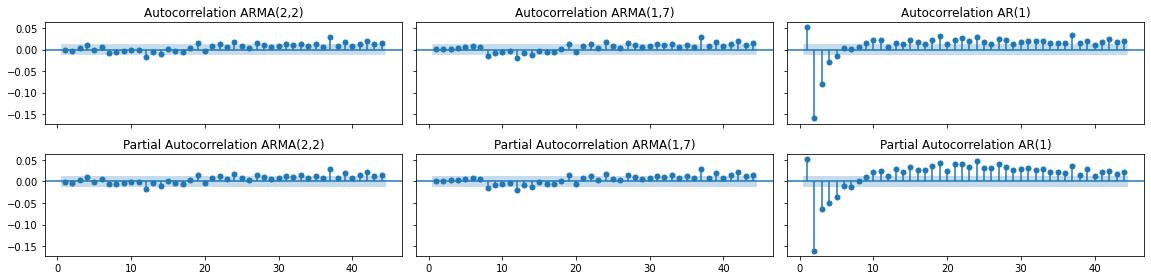

In [89]:
fig, ax = plt.subplots(2,3, figsize=(16,4), sharey=True, sharex=True)
tsaplots.plot_acf(results_ARMA22.resid, ax=ax[0,0], zero=False, 
                  title='Autocorrelation ARMA(2,2)')
tsaplots.plot_pacf(results_ARMA22.resid, ax=ax[1,0], zero=False, 
                   title='Partial Autocorrelation ARMA(2,2)')
tsaplots.plot_acf(results_ARMA17.resid, ax=ax[0,1], zero=False, 
                  title='Autocorrelation ARMA(1,7)')
tsaplots.plot_pacf(results_ARMA17.resid, ax=ax[1,1], zero=False, 
                   title='Partial Autocorrelation ARMA(1,7)')
tsaplots.plot_acf(results_AR1.resid, ax=ax[0,2], zero=False, 
                  title='Autocorrelation AR(1)')
tsaplots.plot_pacf(results_AR1.resid, ax=ax[1,2], zero=False, 
                   title='Partial Autocorrelation AR(1)')
plt.tight_layout()
plt.savefig('Residuals Autocorr.png', bbox_inches='tight');

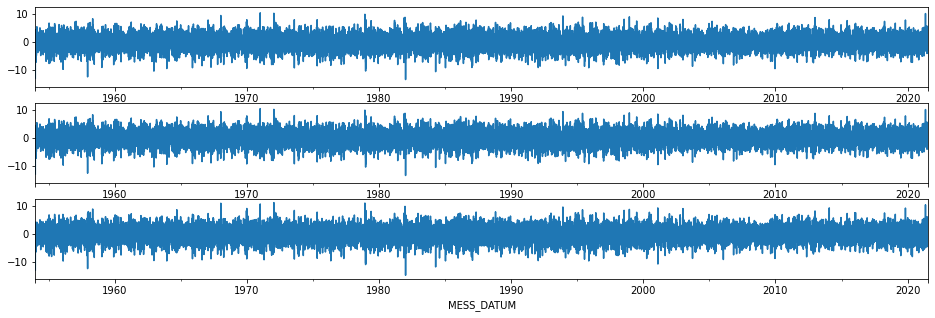

In [90]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,5), sharey=True)
results_ARMA22.resid.plot(ax=ax1)
results_ARMA17.resid.plot(ax=ax2)
results_AR1.resid.plot(ax=ax3);

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/graphics

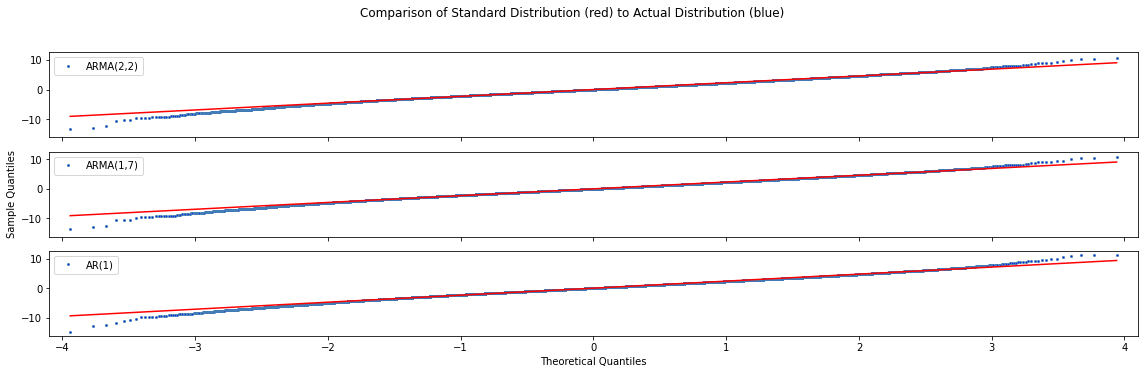

In [91]:
np.random.seed(0)
data = np.random.normal(0,1, 10000)

import statsmodels.api as sm

fig,ax = plt.subplots(3,1, figsize=(16,5), sharex=True, sharey=True)

sm.qqplot(results_ARMA22.resid, ax=ax[0], markersize=2, line='s', 
          color='steelblue', label='ARMA(2,2)')
ax[0].set(xlabel='', ylabel='')
ax[0].legend()
sm.qqplot(results_ARMA17.resid, ax=ax[1], markersize=2, line='s', 
          color='steelblue', label='ARMA(1,7)')
ax[1].set(xlabel='', ylabel='Sample Quantiles')
ax[1].legend()
sm.qqplot(results_AR1.resid, ax=ax[2], markersize=2, line='s', 
          color='steelblue', label='AR(1)')
ax[2].set(xlabel='Theoretical Quantiles', ylabel='')
ax[2].legend()
plt.suptitle('Comparison of Standard Distribution (red) to Actual Distribution (blue)',
            y=1.03)
plt.tight_layout()
plt.savefig('Residual Standard Dist.png', bbox_inches='tight');

## SARIMAX Models

### Mean Temperature

### Re-Modelling all Models using SARIMAX

#### SARIMAX(2,0,2) und (2,1,2)

                                SARIMAX Results                                
Dep. Variable:     Temperature Mean °C   No. Observations:                24674
Model:                SARIMAX(2, 0, 2)   Log Likelihood              -55544.787
Date:                 Sun, 10 Oct 2021   AIC                         111099.574
Time:                         13:51:38   BIC                         111140.142
Sample:                     01-01-1954   HQIC                        111112.713
                          - 07-21-2021                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6084      0.011    147.510      0.000       1.587       1.630
ar.L2         -0.6095      0.011    -56.183      0.000      -0.631      -0.588
ma.L1         -0.6417      0.011    -56.803 

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


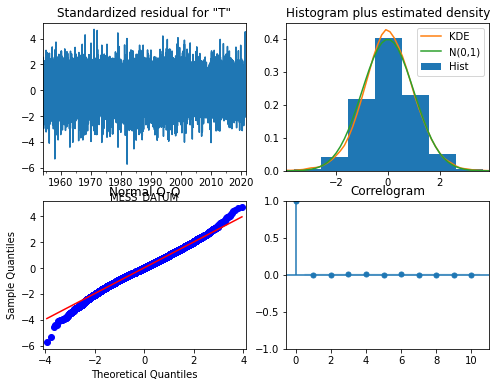

In [92]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_ARIMA202 = SARIMAX(df_54_21['Temperature Mean °C'].asfreq('D'), order=(2,0,2))#, freq='D', )

results_ARIMA202 = model_ARIMA202.fit()

print(results_ARIMA202.summary())

results_ARIMA202.plot_diagnostics(figsize=(8,6))
plt.savefig('ARIMA202 diagnostics.png', bbox_inches='tight');

                                SARIMAX Results                                
Dep. Variable:     Temperature Mean °C   No. Observations:                24674
Model:                SARIMAX(2, 1, 2)   Log Likelihood              -55555.627
Date:                 Sun, 10 Oct 2021   AIC                         111121.254
Time:                         13:51:46   BIC                         111161.821
Sample:                     01-01-1954   HQIC                        111134.392
                          - 07-21-2021                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5740      0.033     17.534      0.000       0.510       0.638
ar.L2          0.0353      0.028      1.274      0.203      -0.019       0.090
ma.L1         -0.6071      0.032    -19.005 

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


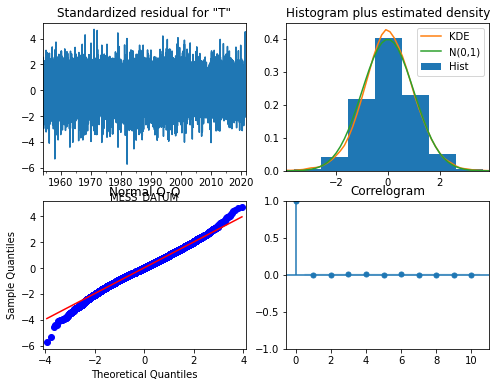

In [93]:
# adding differencing just out of interest
model_ARIMA202_diff = SARIMAX(df_54_21['Temperature Mean °C'].asfreq('D'), order=(2,1,2))#, freq='D', )

results_ARIMA202_diff = model_ARIMA202_diff.fit()

print(results_ARIMA202_diff.summary())

results_ARIMA202.plot_diagnostics(figsize=(8,6));

In [94]:
print(results_ARIMA202.aic - results_ARIMA202_diff.aic)
print(results_ARIMA202.bic - results_ARIMA202_diff.bic)

-21.67920905997744
-21.679006413411116


#### SARIMAX(1,0,7) und (1,1,7)

                                SARIMAX Results                                
Dep. Variable:     Temperature Mean °C   No. Observations:                24674
Model:                SARIMAX(1, 0, 7)   Log Likelihood              -55550.127
Date:                 Sun, 10 Oct 2021   AIC                         111118.254
Time:                         13:51:56   BIC                         111191.276
Sample:                     01-01-1954   HQIC                        111141.904
                          - 07-21-2021                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9969      0.001   1825.992      0.000       0.996       0.998
ma.L1         -0.0317      0.006     -5.405      0.000      -0.043      -0.020
ma.L2         -0.2424      0.006    -40.851 

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


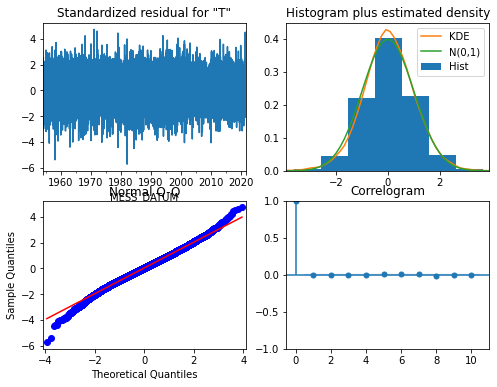

In [95]:
model_ARIMA107 = SARIMAX(df_54_21['Temperature Mean °C'].asfreq('D'), order=(1,0,7))#, freq='D', )

results_ARIMA107 = model_ARIMA107.fit()

print(results_ARIMA107.summary())

results_ARIMA107.plot_diagnostics(figsize=(8,6))
plt.savefig('ARIMA107 diagnostics.png', bbox_inches='tight');

In [96]:
# adding differencing just out of interest
model_ARIMA107_diff = SARIMAX(df_54_21['Temperature Mean °C'].asfreq('D'), order=(1,1,7))#, freq='D', )

results_ARIMA107_diff = model_ARIMA107_diff.fit()

print(results_ARIMA107_diff.summary())

                                SARIMAX Results                                
Dep. Variable:     Temperature Mean °C   No. Observations:                24674
Model:                SARIMAX(1, 1, 7)   Log Likelihood              -55552.350
Date:                 Sun, 10 Oct 2021   AIC                         111122.701
Time:                         13:52:21   BIC                         111195.722
Sample:                     01-01-1954   HQIC                        111146.351
                          - 07-21-2021                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5868      0.091      6.454      0.000       0.409       0.765
ma.L1         -0.6199      0.091     -6.808      0.000      -0.798      -0.441
ma.L2         -0.2236      0.008    -29.595 

### Some Forecasting

#### SARIMAX(2,0,2) und (2,1,2)

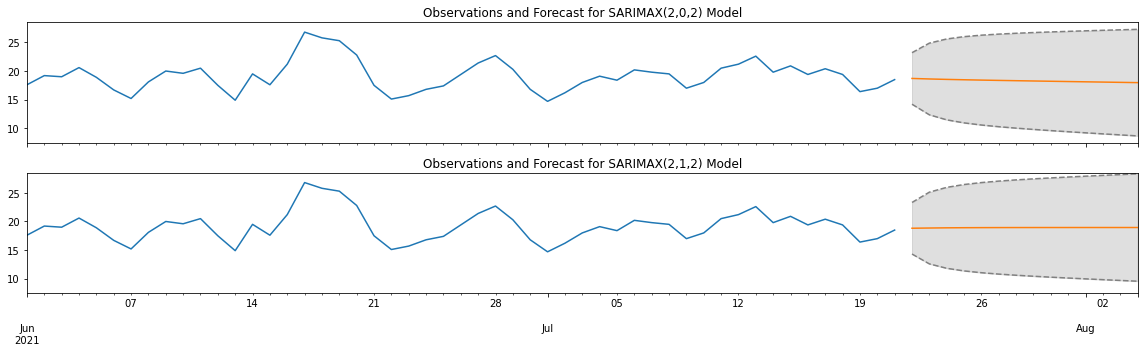

In [97]:
# forecasting
ARIMA202_forecast = results_ARIMA202.get_forecast(steps=14).predicted_mean
ARIMA202_conf_int = results_ARIMA202.get_forecast(steps=14).conf_int()
ARIMA202_diff_forecast = results_ARIMA202_diff.get_forecast(steps=14).predicted_mean
ARIMA202_diff_conf_int = results_ARIMA202_diff.get_forecast(steps=14).conf_int()
# define plot
fig, ax = plt.subplots(2,1, figsize=(16,5), sharex=True)
# ax[0]
df_54_21['2021-06':]['Temperature Mean °C'].plot(ax=ax[0])
ARIMA202_forecast.plot(ax=ax[0])
ARIMA202_conf_int['upper Temperature Mean °C'].plot(ax=ax[0], ls='dashed', color='grey')
ARIMA202_conf_int['lower Temperature Mean °C'].plot(ax=ax[0], ls='dashed', color='grey')
ax[0].fill_between(ARIMA202_conf_int.index, 
                   ARIMA202_conf_int['lower Temperature Mean °C'],
                   ARIMA202_conf_int['upper Temperature Mean °C'], 
                   color='grey', alpha=0.25)
ax[0].set_ylim(7.5, 28.5)
#ax[0].axhline(18.56, ls='dotted', lw=1, color='black')
ax[0].set_xlabel('')
ax[0].set_title('Observations and Forecast for SARIMAX(2,0,2) Model')
# ax[1]
df_54_21['2021-06':]['Temperature Mean °C'].plot(ax=ax[1])
ARIMA202_diff_forecast.plot(ax=ax[1])
ARIMA202_diff_conf_int['upper Temperature Mean °C'].plot(ax=ax[1], ls='dashed', color='grey')
ARIMA202_diff_conf_int['lower Temperature Mean °C'].plot(ax=ax[1], ls='dashed', color='grey')
ax[1].fill_between(ARIMA202_diff_conf_int.index, 
                   ARIMA202_diff_conf_int['lower Temperature Mean °C'],
                   ARIMA202_diff_conf_int['upper Temperature Mean °C'], 
                   color='grey', alpha=0.25)
ax[1].set_ylim(7.5, 28.5)
#ax[1].axhline(18.56, ls='dotted', lw=1, color='black')
ax[1].set_xlabel('')
ax[1].set_title('Observations and Forecast for SARIMAX(2,1,2) Model')
plt.tight_layout()
plt.savefig('Mean Temp SARIMAX202_212.png');

In [98]:
short_stats = []
short_stats.append(['SARIMAX(2,0,2)',
                   results_ARIMA202.get_forecast(steps=14).predicted_mean.min(),
                   results_ARIMA202.get_forecast(steps=14).predicted_mean.mean(),
                   results_ARIMA202.get_forecast(steps=14).predicted_mean.max(),
                   ARIMA202_conf_int['lower Temperature Mean °C'].min(),
                   ARIMA202_conf_int['upper Temperature Mean °C'].max()])
short_stats.append(['SARIMAX(2,1,2)',
                   results_ARIMA202_diff.get_forecast(steps=14).predicted_mean.min(),
                   results_ARIMA202_diff.get_forecast(steps=14).predicted_mean.mean(),
                   results_ARIMA202_diff.get_forecast(steps=14).predicted_mean.max(),
                   ARIMA202_diff_conf_int['lower Temperature Mean °C'].min(),
                   ARIMA202_diff_conf_int['upper Temperature Mean °C'].max()])
df_short_stats = pd.DataFrame(short_stats, columns=['model', 'min temp', 'mean temp', 
                                                    'max temp', 'lower', 'upper'])

df_short_stats['temp_span'] = df_short_stats['max temp'] - df_short_stats['min temp']
df_short_stats['conf_int_span'] = df_short_stats['upper'] - df_short_stats['lower']
display(df_short_stats)

model   min temp  mean temp   max temp     lower      upper  \
0  SARIMAX(2,0,2)  17.974051  18.302584  18.704252  8.661833  27.286270   
1  SARIMAX(2,1,2)  18.819199  18.920264  18.945999  9.562076  28.329922   

   temp_span  conf_int_span  
0     0.7302      18.624437  
1     0.1268      18.767846

#### SARIMAX(1,0,7) und (2,0,2)

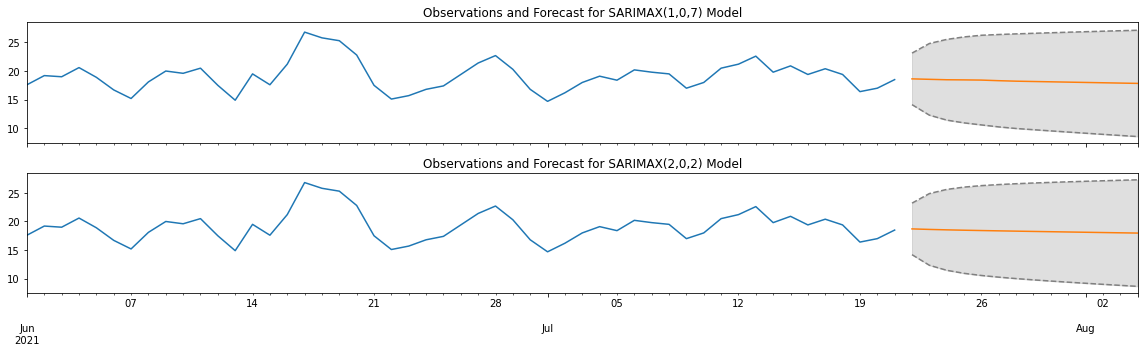

In [99]:
# forecasting
ARIMA107_forecast = results_ARIMA107.get_forecast(steps=14).predicted_mean
ARIMA107_conf_int = results_ARIMA107.get_forecast(steps=14).conf_int()
ARIMA202_forecast = results_ARIMA202.get_forecast(steps=14).predicted_mean
ARIMA202_conf_int = results_ARIMA202.get_forecast(steps=14).conf_int()
# define plot
fig, ax = plt.subplots(2,1, figsize=(16,5), sharex=True)
# ax[0]
df_54_21['2021-06':]['Temperature Mean °C'].plot(ax=ax[0])
ARIMA107_forecast.plot(ax=ax[0])
ARIMA107_conf_int['upper Temperature Mean °C'].plot(ax=ax[0], ls='dashed', color='grey')
ARIMA107_conf_int['lower Temperature Mean °C'].plot(ax=ax[0], ls='dashed', color='grey')
ax[0].fill_between(ARIMA107_conf_int.index, 
                   ARIMA107_conf_int['lower Temperature Mean °C'],
                   ARIMA107_conf_int['upper Temperature Mean °C'], 
                   color='grey', alpha=0.25)
ax[0].set_ylim(7.5, 28.5)
#ax[0].axhline(18.56, ls='dotted', lw=1, color='black')
ax[0].set_xlabel('')
ax[0].set_title('Observations and Forecast for SARIMAX(1,0,7) Model')
# ax[1]
df_54_21['2021-06':]['Temperature Mean °C'].plot(ax=ax[1])
ARIMA202_forecast.plot(ax=ax[1])
ARIMA202_conf_int['upper Temperature Mean °C'].plot(ax=ax[1], ls='dashed', color='grey')
ARIMA202_conf_int['lower Temperature Mean °C'].plot(ax=ax[1], ls='dashed', color='grey')
ax[1].fill_between(ARIMA202_conf_int.index, 
                   ARIMA202_conf_int['lower Temperature Mean °C'],
                   ARIMA202_conf_int['upper Temperature Mean °C'], 
                   color='grey', alpha=0.25)
ax[1].set_ylim(7.5, 28.5)
#ax[1].axhline(18.56, ls='dotted', lw=1, color='black')
ax[1].set_xlabel('')
ax[1].set_title('Observations and Forecast for SARIMAX(2,0,2) Model')
plt.tight_layout()
plt.savefig('Mean Temp SARIMAX107_202.png');

In [100]:
short_stats = []
short_stats.append(['SARIMAX(1,0,7)',
                   results_ARIMA107.get_forecast(steps=14).predicted_mean.min(),
                   results_ARIMA107.get_forecast(steps=14).predicted_mean.mean(),
                   results_ARIMA107.get_forecast(steps=14).predicted_mean.max(),
                   ARIMA107_conf_int['lower Temperature Mean °C'].min(),
                   ARIMA107_conf_int['upper Temperature Mean °C'].max()])
short_stats.append(['SARIMAX(2,0,2)',
                   results_ARIMA202.get_forecast(steps=14).predicted_mean.min(),
                   results_ARIMA202.get_forecast(steps=14).predicted_mean.mean(),
                   results_ARIMA202.get_forecast(steps=14).predicted_mean.max(),
                   ARIMA202_conf_int['lower Temperature Mean °C'].min(),
                   ARIMA202_conf_int['upper Temperature Mean °C'].max()])
df_short_stats = pd.DataFrame(short_stats, columns=['model', 'min temp', 'mean temp', 
                                                    'max temp', 'lower', 'upper'])

df_short_stats['temp_span'] = df_short_stats['max temp'] - df_short_stats['min temp']
df_short_stats['conf_int_span'] = df_short_stats['upper'] - df_short_stats['lower']
display(df_short_stats)

model   min temp  mean temp   max temp     lower      upper  \
0  SARIMAX(1,0,7)  17.839901  18.221734  18.630636  8.550904  27.128898   
1  SARIMAX(2,0,2)  17.974051  18.302584  18.704252  8.661833  27.286270   

   temp_span  conf_int_span  
0   0.790735      18.577993  
1   0.730200      18.624437

### Longer-term Forecast

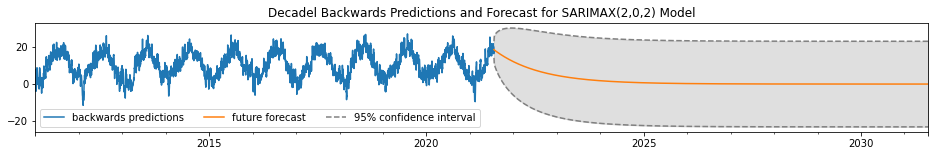

In [101]:
# forecasting
ARIMA202LT_backcast = results_ARIMA202.get_prediction(start='2011-01-01').predicted_mean
ARIMA202LT_forecast = results_ARIMA202.get_forecast(steps=3650).predicted_mean
ARIMA202LT_conf_int = results_ARIMA202.get_forecast(steps=3650).conf_int()
# plot
fig, ax = plt.subplots(figsize=(16,2))
#df_54_21['2011':]['Temperature Mean °C'].plot(ax=ax)
ARIMA202LT_backcast.plot(ax=ax, label='backwards predictions')
ARIMA202LT_forecast.plot(ax=ax, label='future forecast')
ARIMA202LT_conf_int['upper Temperature Mean °C'].plot(ax=ax, ls='dashed', color='grey',
                                                     label='95% confidence interval')
ARIMA202LT_conf_int['lower Temperature Mean °C'].plot(ax=ax, ls='dashed', color='grey',
                                                     label='')
ax.legend(ncol=3)
ax.fill_between(ARIMA202LT_conf_int.index, 
                ARIMA202LT_conf_int['lower Temperature Mean °C'],
                ARIMA202LT_conf_int['upper Temperature Mean °C'], 
                color='grey', alpha=0.25)
#ax.set_ylim(7.5, 28.5)
ax.set_xlabel('')
ax.set_title('Decadel Backwards Predictions and Forecast for SARIMAX(2,0,2) Model')
plt.savefig('Decadel SARIMAX202 without S.png', bbox_inches='tight');

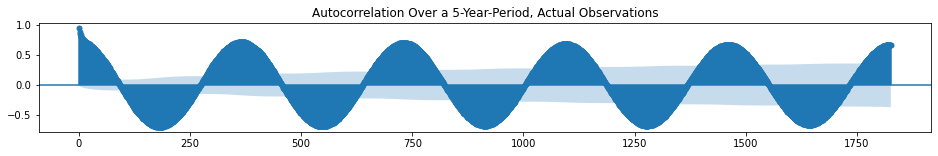

In [102]:
fig, ax = plt.subplots(figsize=(16,2))
tsaplots.plot_acf(df_54_21['Temperature Mean °C'], lags=365*5+1, zero=False, ax=ax,
                 title='Autocorrelation Over a 5-Year-Period, Actual Observations')
plt.savefig('Temp Mean Autocorr 5 year.png', bbox_inches='tight');

#### Resampling to monthly data

In [103]:
print('overall mean "Temperature Mean °C":', df_54_21['Temperature Mean °C'].mean())
print('overall median "Temperature Mean °C":', df_54_21['Temperature Mean °C'].median())
print(9.6 - 9.382540325849066)

overall mean "Temperature Mean °C": 9.382540325849071
overall median "Temperature Mean °C": 9.6
0.21745967415093403


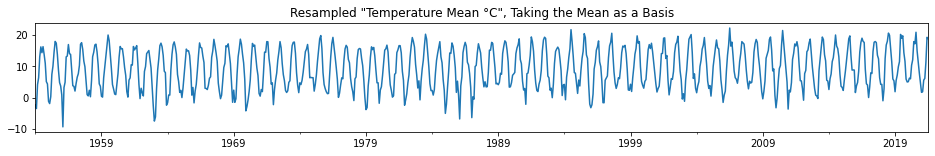

In [104]:
df_54_21_monthmean = df_54_21['Temperature Mean °C'].resample('M').mean()
df_54_21_monthmean.plot(title='Resampled "Temperature Mean °C", Taking the Mean as a Basis',
                       figsize=(16,2))
plt.xlabel('')
plt.savefig('Rasampled Temp Mean Mean.png', bbox_inches='tight');

In [105]:
result = adfuller(df_54_21_monthmean)

# Print test statistic
print('adf test statistic:', result[0], 'p-value:', result[1], 'critical values:', result[4],
      sep='\n')

adf test statistic:
-4.137969795192531
p-value:
0.0008376447876420032
critical values:
{'1%': -3.4386652124595614, '5%': -2.865210127510208, '10%': -2.5687243221835088}


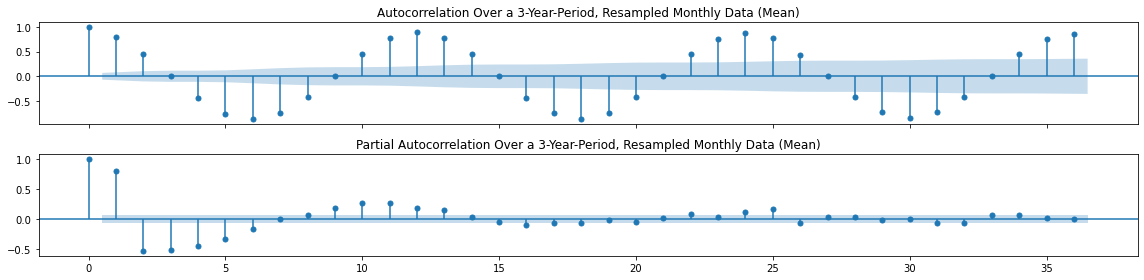

In [106]:
fig, ax = plt.subplots(2,1, figsize=(16,4), sharex=True)
tsaplots.plot_acf(df_54_21_monthmean, lags=36, ax=ax[0],
                 title='Autocorrelation Over a 3-Year-Period, Resampled Monthly Data (Mean)')
tsaplots.plot_pacf(df_54_21_monthmean, lags=36, ax=ax[1],
                 title='Partial Autocorrelation Over a 3-Year-Period, Resampled Monthly Data (Mean)')
plt.tight_layout()
plt.savefig('Temp Mean Autocorr 3 year.png', bbox_inches='tight');

[12, 24, 36, 48, 60, 72, 84, 96, 108, 120]


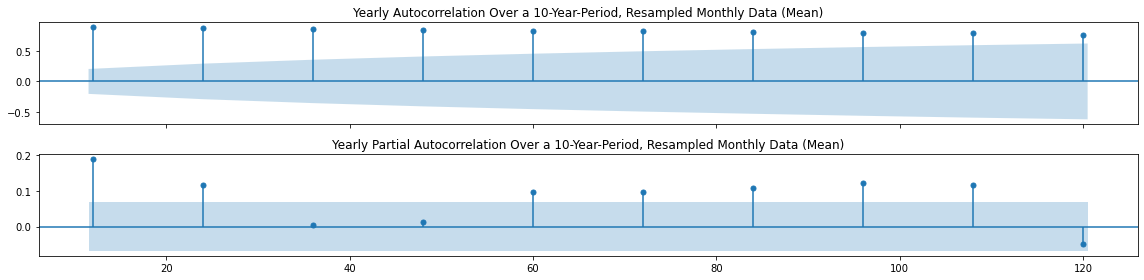

In [107]:
lags = list(range(12, 121, 12))
print(lags)
fig, ax = plt.subplots(2,1, figsize=(16,4), sharex=True)
tsaplots.plot_acf(df_54_21_monthmean, lags=lags, zero=False, ax=ax[0],
                 title='Yearly Autocorrelation Over a 10-Year-Period, Resampled Monthly Data (Mean)')
tsaplots.plot_pacf(df_54_21_monthmean, lags=lags, zero=False, ax=ax[1],
                 title='Yearly Partial Autocorrelation Over a 10-Year-Period, Resampled Monthly Data (Mean)')
plt.tight_layout()
plt.savefig('Temp Mean Autocorr Seasonal 10 year.png', bbox_inches='tight');

In [108]:
# Create empty list to store search results
order_aic_bic=[]

# Loop over p values from 0-3
for p in range(4):
  # Loop over q values from 0-3
    for d in range(4):
        for q in range(4):
            try:
                model = SARIMAX(df_54_21_monthmean.asfreq('M'), order=(p, d, q))
                results = model.fit()

                # Append order and results tuple
                order_aic_bic.append((p, d, q, results.aic, results.bic))
                print(p, d, q, 'done', end='   ')

            except:
                print(p, d, q, 'skipped', end='   ')

order_df = pd.DataFrame(order_aic_bic, columns=['AR(p)', 'D(d)', 'MA(q)', 'AIC', 'BIC'])
#order_df.set_index(['AR(p)', 'MA(q)'], inplace=True)

# Print order_df in order of increasing AIC, BIC
display(order_df.sort_values('AIC').head(3))
display(order_df.sort_values('BIC').head(3))

0 0 0 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


0 0 1 done   0 0 2 done   0 0 3 done   0 1 0 done   0 1 1 done   0 1 2 done   0 1 3 done   0 2 0 done   0 2 1 done   0 2 2 done   0 2 3 done   0 3 0 done   0 3 1 done   0 3 2 done   0 3 3 done   1 0 0 done   1 0 1 done   1 0 2 done   1 0 3 done   1 1 0 done   1 1 1 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


1 1 2 done   1 1 3 done   1 2 0 done   1 2 1 done   1 2 2 done   1 2 3 done   1 3 0 done   1 3 1 done   1 3 2 done   1 3 3 done   2 0 0 done   2 0 1 done   2 0 2 done   2 0 3 done   2 1 0 done   2 1 1 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


2 1 2 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


2 1 3 done   2 2 0 done   2 2 1 done   2 2 2 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


2 2 3 done   2 3 0 done   2 3 1 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


2 3 2 done   2 3 3 done   3 0 0 done   3 0 1 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


3 0 2 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


3 0 3 done   3 1 0 done   3 1 1 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


3 1 2 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


3 1 3 done   3 2 0 done   3 2 1 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


3 2 2 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


3 2 3 done   3 3 0 done   3 3 1 done   3 3 2 done   3 3 3 done   

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


AR(p)  D(d)  MA(q)          AIC          BIC
55      3     1      3  3401.464986  3434.344225
39      2     1      3  3415.946586  3444.128792
51      3     0      3  3458.416798  3491.304674

AR(p)  D(d)  MA(q)          AIC          BIC
55      3     1      3  3401.464986  3434.344225
39      2     1      3  3415.946586  3444.128792
51      3     0      3  3458.416798  3491.304674

In [109]:
# # Create empty list to store search results
# order_aic_bic=[]

# # Loop over p values from 0-3
# for P in range(4):
#   # Loop over q values from 0-3
#     for D in range(4):
#         for Q in range(4):
#             try:
#                 model = SARIMAX(df_54_21_monthmean.asfreq('M'), order=(2, 1, 3),
#                                seasonal_order=(P, D, Q, 12), )
#                 results = model.fit()

#                 # Append order and results tuple
#                 order_aic_bic.append((P, D, Q, results.aic, results.bic))
#                 print(P, D, Q, 'done', end='   ')

#             except:
#                 print(P, D, Q, 'skipped', end='   ')

# order_df = pd.DataFrame(order_aic_bic, columns=['AR(P)', 'D(D)', 'MA(Q)', 'AIC', 'BIC'])
# #order_df.set_index(['AR(p)', 'MA(q)'], inplace=True)

# # Print order_df in order of increasing AIC, BIC
# display(order_df.sort_values('AIC').head(3))
# display(order_df.sort_values('BIC').head(3))

"executed in 55m 6s, finished 13:07:55 2021-08-18"

    AR(P) 	D(D) 	MA(Q) 	AIC 	BIC
    5 	0 	1 	1 	3342.125471 	3374.900231
    21 	1 	1 	2 	3343.483434 	3385.622411
    6 	0 	1 	2 	3343.547443 	3381.004312
        AR(P) 	D(D) 	MA(Q) 	AIC 	BIC
    5 	0 	1 	1 	3342.125471 	3374.900231
    6 	0 	1 	2 	3343.547443 	3381.004312
    20 	1 	1 	1 	3343.573557 	3381.030426

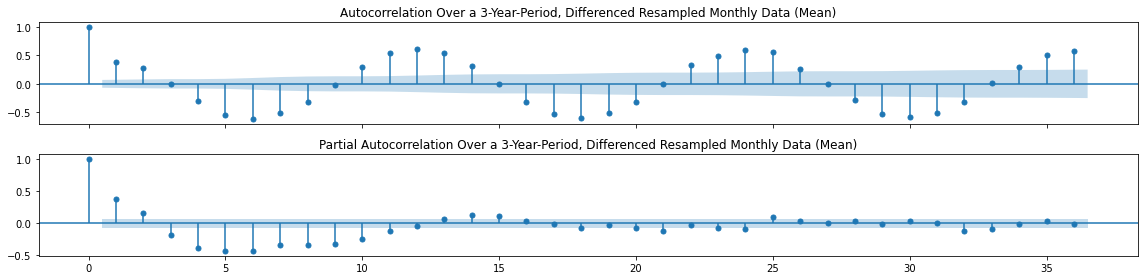

In [110]:
fig, ax = plt.subplots(2,1, figsize=(16,4), sharex=True)
tsaplots.plot_acf(df_54_21_monthmean.diff().dropna(), lags=36, ax=ax[0],
                 title='Autocorrelation Over a 3-Year-Period, Differenced Resampled Monthly Data (Mean)')
tsaplots.plot_pacf(df_54_21_monthmean.diff().dropna(), lags=36, ax=ax[1],
                 title='Partial Autocorrelation Over a 3-Year-Period, Differenced Resampled Monthly Data (Mean)')
plt.tight_layout()
plt.savefig('Temp Mean Diff Autocorr 3 year.png', bbox_inches='tight');

[12, 24, 36, 48, 60, 72, 84, 96, 108, 120]


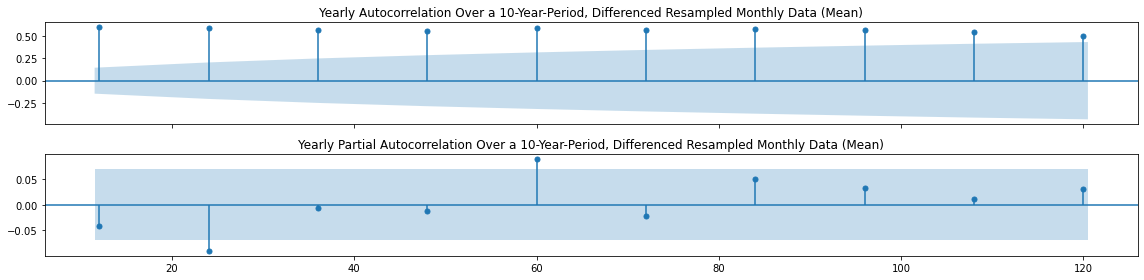

In [111]:
lags = list(range(12, 121, 12))
print(lags)
fig, ax = plt.subplots(2,1, figsize=(16,4), sharex=True)
tsaplots.plot_acf(df_54_21_monthmean.diff().dropna(), lags=lags, zero=False, ax=ax[0],
                 title='Yearly Autocorrelation Over a 10-Year-Period, Differenced Resampled Monthly Data (Mean)')
tsaplots.plot_pacf(df_54_21_monthmean.diff().dropna(), lags=lags, zero=False, ax=ax[1],
                 title='Yearly Partial Autocorrelation Over a 10-Year-Period, Differenced Resampled Monthly Data (Mean)')
plt.tight_layout()
plt.savefig('Temp Mean Diff Autocorr Seasonal 10 year.png', bbox_inches='tight');

                                      SARIMAX Results                                       
Dep. Variable:                  Temperature Mean °C   No. Observations:                  811
Model:             SARIMAX(2, 1, 3)x(0, 1, [1], 12)   Log Likelihood               -1676.661
Date:                              Sun, 10 Oct 2021   AIC                           3369.322
Time:                                      13:53:35   BIC                           3406.779
Sample:                                  01-31-1954   HQIC                          3383.713
                                       - 07-31-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0001      0.000      0.945      0.345      -0.000       0.000
ar.L1         -1.24

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


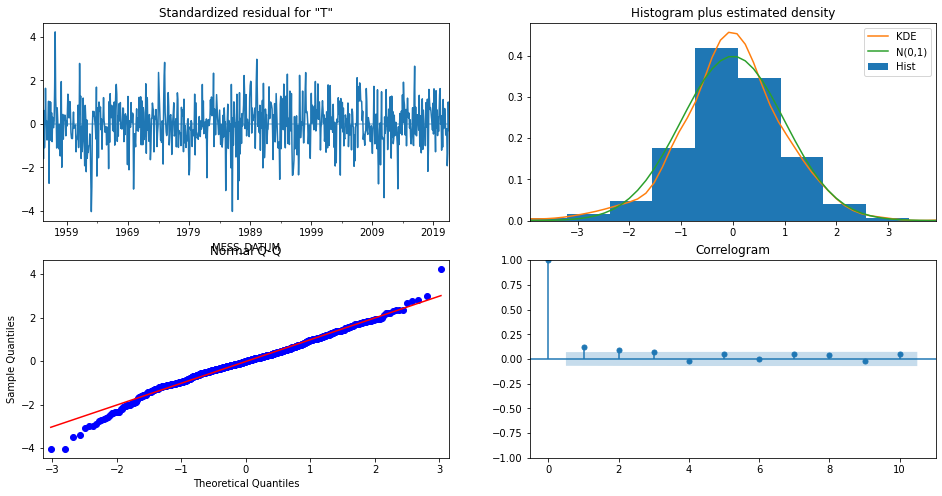

In [112]:
model = SARIMAX(df_54_21_monthmean.asfreq('M'), order=(2, 1, 3), trend='c',
                seasonal_order=(0, 1, 1, 12))

results = model.fit()

print(results.summary())

results.plot_diagnostics()
plt.savefig('SARIMAX seasonal diagnostics 213_01112.png', bbox_inches='tight');

    Test          Null hypothesis                            P-value name
    =====================================================================
    Ljung-Box     There are no correlations in the residual  Prob(Q)
    Jarque-Bera   The residuals are normally distributed     Prob(JB)

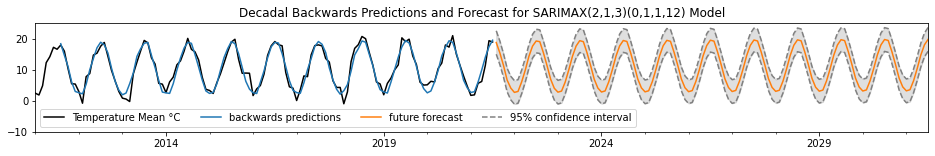

In [113]:
# forecasting
LT_backcast = results.get_prediction(start=-120).predicted_mean
LT_forecast = results.get_forecast(steps=120).predicted_mean
LT_conf_int = results.get_forecast(steps=120).conf_int()
# plot
fig, ax = plt.subplots(figsize=(16,2))
df_54_21_monthmean['2011':].plot(ax=ax, color='black')
LT_backcast.plot(ax=ax, label='backwards predictions')
LT_forecast.plot(ax=ax, label='future forecast')
LT_conf_int['upper Temperature Mean °C'].plot(ax=ax, ls='dashed', color='grey',
                                                     label='95% confidence interval')
LT_conf_int['lower Temperature Mean °C'].plot(ax=ax, ls='dashed', color='grey',
                                                     label='')
ax.legend(ncol=4, loc='lower left')
ax.fill_between(LT_conf_int.index, 
                LT_conf_int['lower Temperature Mean °C'],
                LT_conf_int['upper Temperature Mean °C'], 
                color='grey', alpha=0.25)
ax.set_ylim(-10, 25)
ax.set_xlabel('')
ax.set_title('Decadal Backwards Predictions and Forecast for SARIMAX(2,1,3)(0,1,1,12) Model')
plt.savefig('Decadel SARIMAX_213_01112.png', bbox_inches='tight');

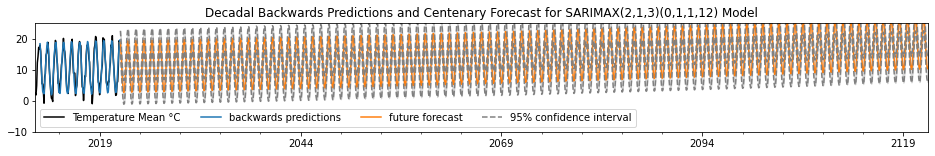

In [114]:
model = SARIMAX(df_54_21_monthmean.asfreq('M'), order=(2, 1, 3), trend='c',
                seasonal_order=(0, 1, 1, 12))

results = model.fit()

# forecasting
LT_backcast = results.get_prediction(start=-120).predicted_mean
LT_forecast = results.get_forecast(steps=1207).predicted_mean
LT_conf_int = results.get_forecast(steps=1207).conf_int()
# plot
fig, ax = plt.subplots(figsize=(16,2))
df_54_21_monthmean['2011':].plot(ax=ax, color='black')
LT_backcast.plot(ax=ax, label='backwards predictions')
LT_forecast.plot(ax=ax, label='future forecast')
LT_conf_int['upper Temperature Mean °C'].plot(ax=ax, ls='dashed', color='grey',
                                                     label='95% confidence interval')
LT_conf_int['lower Temperature Mean °C'].plot(ax=ax, ls='dashed', color='grey',
                                                     label='')
ax.legend(ncol=4, loc='lower left')
ax.fill_between(LT_conf_int.index, 
                LT_conf_int['lower Temperature Mean °C'],
                LT_conf_int['upper Temperature Mean °C'], 
                color='grey', alpha=0.25)
ax.set_ylim(-10, 25)
ax.set_xlabel('')
ax.set_title('Decadal Backwards Predictions and Centenary Forecast for SARIMAX(2,1,3)(0,1,1,12) Model')
plt.savefig('Centenary SARIMAX_213_01112_LT.png', bbox_inches='tight');

year       mean
0  2021  11.246993
1  2022  10.776133
2  2023  10.832745

year       mean
98   2119  18.090706
99   2120  18.189549
100  2121  18.288870

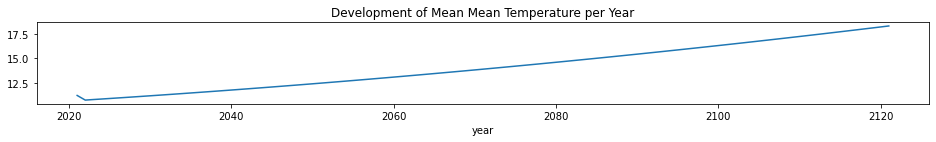

In [115]:
years = list(range(2021, 2122))
LT_forecast_mean = []
for year in years:
    LT_forecast_mean.append((year, LT_forecast[str(year)].mean()))
df_LT_forecast_mean = pd.DataFrame(LT_forecast_mean, columns=['year', 'mean'])
display(df_LT_forecast_mean.head(3), df_LT_forecast_mean.tail(3))
df_LT_forecast_mean.set_index('year', inplace=True)
df_LT_forecast_mean.plot(figsize=(16,1.5), legend=False, 
                         title='Development of Mean Mean Temperature per Year');

                                      SARIMAX Results                                       
Dep. Variable:                  Temperature Mean °C   No. Observations:                  811
Model:             SARIMAX(2, 0, 2)x(0, 1, [1], 12)   Log Likelihood               -1659.697
Date:                              Sun, 10 Oct 2021   AIC                           3333.394
Time:                                      13:54:07   BIC                           3366.177
Sample:                                  01-31-1954   HQIC                          3345.989
                                       - 07-31-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0224      0.026      0.878      0.380      -0.028       0.072
ar.L1          0.13

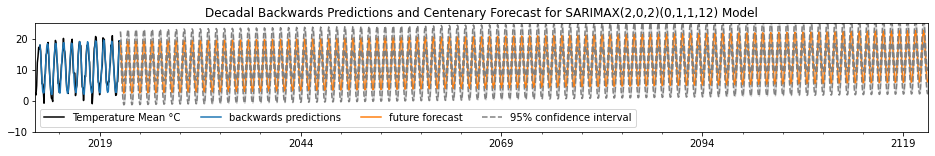

In [116]:
model = SARIMAX(df_54_21_monthmean.asfreq('M'), order=(2, 0, 2), trend='c',
                seasonal_order=(0, 1, 1, 12))

results = model.fit()

print(results.summary())

# forecasting
LT_backcast = results.get_prediction(start=-120).predicted_mean
LT_forecast = results.get_forecast(steps=1207).predicted_mean
LT_conf_int = results.get_forecast(steps=1207).conf_int()
# plot
fig, ax = plt.subplots(figsize=(16,2))
df_54_21_monthmean['2011':].plot(ax=ax, color='black')
LT_backcast.plot(ax=ax, label='backwards predictions')
LT_forecast.plot(ax=ax, label='future forecast')
LT_conf_int['upper Temperature Mean °C'].plot(ax=ax, ls='dashed', color='grey',
                                                     label='95% confidence interval')
LT_conf_int['lower Temperature Mean °C'].plot(ax=ax, ls='dashed', color='grey',
                                                     label='')
ax.legend(ncol=4, loc='lower left')
ax.fill_between(LT_conf_int.index, 
                LT_conf_int['lower Temperature Mean °C'],
                LT_conf_int['upper Temperature Mean °C'], 
                color='grey', alpha=0.25)
ax.set_ylim(-10, 25)
ax.set_xlabel('')
ax.set_title('Decadal Backwards Predictions and Centenary Forecast for SARIMAX(2,0,2)(0,1,1,12) Model')
plt.savefig('Centenary SARIMAX_202_01112_LT.png', bbox_inches='tight');

year       mean
0  2021  11.069195
1  2022  10.580727
2  2023  10.616373

year       mean
98   2119  14.027749
99   2120  14.063284
100  2121  14.098819

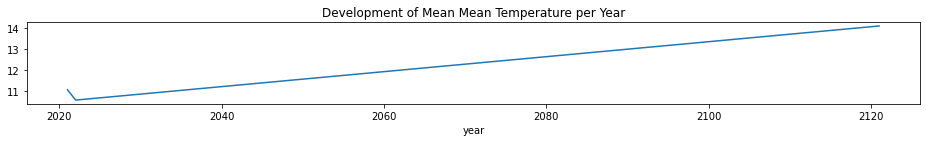

In [117]:
years = list(range(2021, 2122))
LT_forecast_mean = []
for year in years:
    LT_forecast_mean.append((year, LT_forecast[str(year)].mean()))
df_LT_forecast_mean = pd.DataFrame(LT_forecast_mean, columns=['year', 'mean'])
display(df_LT_forecast_mean.head(3), df_LT_forecast_mean.tail(3))
df_LT_forecast_mean.set_index('year', inplace=True)
df_LT_forecast_mean.plot(figsize=(16,1.5), legend=False, 
                         title='Development of Mean Mean Temperature per Year');

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


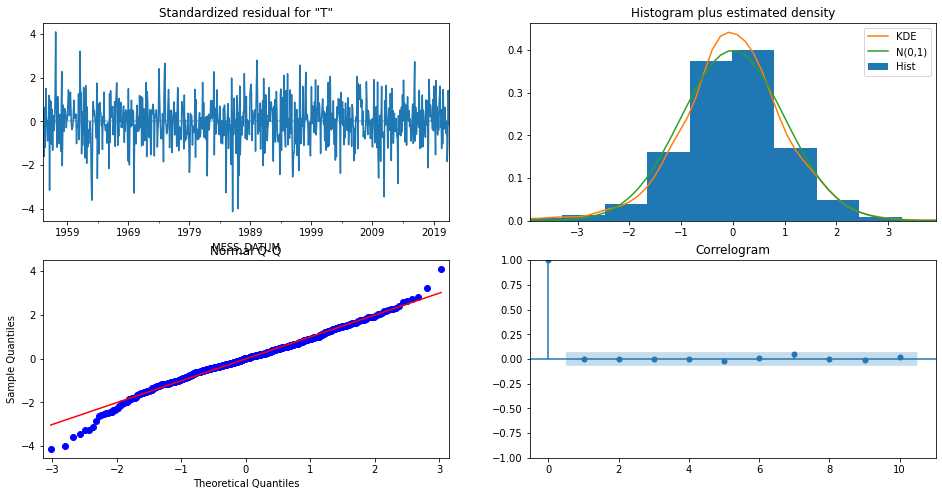

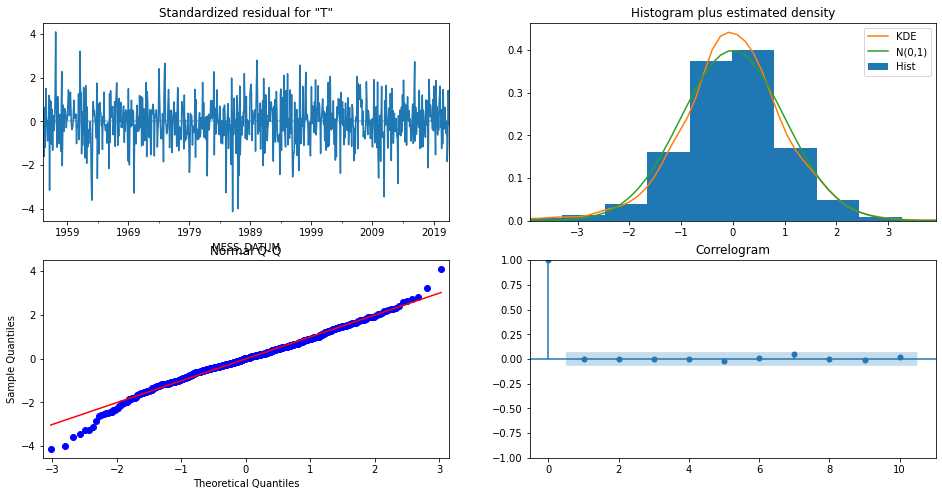

In [118]:
results.plot_diagnostics()

In [119]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                  Temperature Mean °C   No. Observations:                  811
Model:             SARIMAX(2, 0, 2)x(0, 1, [1], 12)   Log Likelihood               -1659.697
Date:                              Sun, 10 Oct 2021   AIC                           3333.394
Time:                                      13:54:09   BIC                           3366.177
Sample:                                  01-31-1954   HQIC                          3345.989
                                       - 07-31-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0224      0.026      0.878      0.380      -0.028       0.072
ar.L1          0.13

### Best Parameters

In [120]:
import pmdarima as pm

In [121]:
print(pm.auto_arima(df_54_21_monthmean))

 ARIMA(2,1,5)(0,0,0)[0]          


In [122]:
model = SARIMAX(df_54_21_monthmean, order=(2,1,5))

results = model.fit()

print(results.summary())

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                SARIMAX Results                                
Dep. Variable:     Temperature Mean °C   No. Observations:                  811
Model:                SARIMAX(2, 1, 5)   Log Likelihood               -1681.947
Date:                 Sun, 10 Oct 2021   AIC                           3379.894
Time:                         13:54:57   BIC                           3417.471
Sample:                     01-31-1954   HQIC                          3394.321
                          - 07-31-2021                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7317      0.000   5848.611      0.000       1.731       1.732
ar.L2         -0.9997      0.000  -4200.395      0.000      -1.000      -0.999
ma.L1         -2.5038      0.031    -81.481 

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [123]:
print(pm.auto_arima(df_54_21_monthmean, d=0))

 ARIMA(5,0,1)(0,0,0)[0] intercept


In [124]:
model = SARIMAX(df_54_21_monthmean, order=(5,0,1))

results = model.fit()

print(results.summary())

                                SARIMAX Results                                
Dep. Variable:     Temperature Mean °C   No. Observations:                  811
Model:                SARIMAX(5, 0, 1)   Log Likelihood               -1863.218
Date:                 Sun, 10 Oct 2021   AIC                           3740.436
Time:                         13:55:13   BIC                           3773.324
Sample:                     01-31-1954   HQIC                          3753.062
                          - 07-31-2021                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7144      0.028     61.380      0.000       1.660       1.769
ar.L2         -0.5183      0.061     -8.502      0.000      -0.638      -0.399
ar.L3         -0.3021      0.063     -4.764 

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [125]:
print(pm.auto_arima(df_54_21_monthmean, seasonal=True, m=12))

 ARIMA(2,1,0)(1,0,0)[12]          


In [126]:
model = SARIMAX(df_54_21_monthmean, order=(2,1,0), seasonal_order=(1,0,0,12))

results = model.fit()

print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                Temperature Mean °C   No. Observations:                  811
Model:             SARIMAX(2, 1, 0)x(1, 0, 0, 12)   Log Likelihood               -2001.092
Date:                            Sun, 10 Oct 2021   AIC                           4010.184
Time:                                    13:56:45   BIC                           4028.972
Sample:                                01-31-1954   HQIC                          4017.397
                                     - 07-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5237      0.031    -17.119      0.000      -0.584      -0.464
ar.L2         -0.2799      0.029   

In [127]:
print(pm.auto_arima(df_54_21_monthmean, d=0, seasonal=True, m=12))

 ARIMA(1,0,1)(2,0,0)[12] intercept


In [128]:
model = SARIMAX(df_54_21_monthmean, order=(1,0,1), seasonal_order=(2,0,0,12))

results = model.fit()

print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                 Temperature Mean °C   No. Observations:                  811
Model:             SARIMAX(1, 0, 1)x(2, 0, [], 12)   Log Likelihood               -1842.561
Date:                             Sun, 10 Oct 2021   AIC                           3695.122
Time:                                     13:58:25   BIC                           3718.613
Sample:                                 01-31-1954   HQIC                          3704.140
                                      - 07-31-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5801      0.125      4.625      0.000       0.334       0.826
ma.L1         -0.3862      

## Machine Learning

### Feature Selection and Normalization

In [129]:
print(df_54_21.columns)

Index(['Wind Speed Max m/sec', 'Wind Speed Mean m/sec', 'Rainfall mm',
       'Sunshine hours', 'Snowfall cm', 'Cloud Coverage Mean eights',
       'Vapour Pressure Mean hpa', 'Pressure Mean hpa', 'Temperature Mean °C',
       'Relative Humidity Mean %', 'Temperature 2m Max °C',
       'Temperature 2m Min °C', 'Temperature 5cm Min °C'],
      dtype='object')


Is there a way to predict the mean temperature from the other features, using only the mean or absolute values of these, not min and max throughout the day?

In [130]:
X = df_54_21[['Temperature Mean °C', 'Wind Speed Mean m/sec', 'Rainfall mm',
       'Sunshine hours', 'Snowfall cm', 'Cloud Coverage Mean eights',
       'Vapour Pressure Mean hpa', 'Pressure Mean hpa', 'Relative Humidity Mean %']]

display(X.head())

Temperature Mean °C  Wind Speed Mean m/sec  Rainfall mm  \
MESS_DATUM                                                            
1954-01-01                 -3.5                    1.5          0.0   
1954-01-02                 -3.4                    2.1          1.5   
1954-01-03                  0.4                    5.3          1.5   
1954-01-04                 -0.9                    2.9          2.4   
1954-01-05                 -6.2                    3.7          0.0   

            Sunshine hours  Snowfall cm  Cloud Coverage Mean eights  \
MESS_DATUM                                                            
1954-01-01             5.9          1.0                         5.7   
1954-01-02             0.0          0.0                         7.3   
1954-01-03             3.2          1.0                         4.3   
1954-01-04             0.0          3.0                         8.0   
1954-01-05             4.3          5.0                         1.0   

            Vapour Pressure Mean hpa  Pressure Mean hpa  \
MESS_DATUM                                                
1954-01-01                       4.5             1026.2   
1954-01-02                       4.1             1025.2   
1954-01-03                       5.3             1000.6   
1954-01-04                       5.1             1008.0   
1954-01-05                       3.5             1016.0   

            Relative Humidity Mean %  
MESS_DATUM                            
1954-01-01                      92.0  
1954-01-02                      90.0  
1954-01-03                      83.0  
1954-01-04                      90.0  
1954-01-05                      84.0

These features need to be rescaled for clustering. Otherwise features like Pressure and Humidity would get more weight than the others.

In [131]:
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)
display(X_scaled.head())

Temperature Mean °C  Wind Speed Mean m/sec  Rainfall mm  \
MESS_DATUM                                                            
1954-01-01            -1.794535              -1.351912    -0.461298   
1954-01-02            -1.780605              -1.010559    -0.070277   
1954-01-03            -1.251266               0.809989    -0.070277   
1954-01-04            -1.432356              -0.555422     0.164335   
1954-01-05            -2.170644              -0.100285    -0.461298   

            Sunshine hours  Snowfall cm  Cloud Coverage Mean eights  \
MESS_DATUM                                                            
1954-01-01        0.394768     0.238947                    0.083559   
1954-01-02       -1.017538    -0.183932                    0.851757   
1954-01-03       -0.251542     0.238947                   -0.588613   
1954-01-04       -1.017538     1.084703                    1.187843   
1954-01-05        0.011770     1.930460                   -2.173020   

            Vapour Pressure Mean hpa  Pressure Mean hpa  \
MESS_DATUM                                                
1954-01-01                 -1.366152           1.864438   
1954-01-02                 -1.467570           1.758207   
1954-01-03                 -1.163316          -0.855064   
1954-01-04                 -1.214025          -0.068958   
1954-01-05                 -1.619698           0.780886   

            Relative Humidity Mean %  
MESS_DATUM                            
1954-01-01                  1.165396  
1954-01-02                  0.987366  
1954-01-03                  0.364259  
1954-01-04                  0.987366  
1954-01-05                  0.453275

/Users/Deahna/opt/anaconda3/envs/geopandas/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


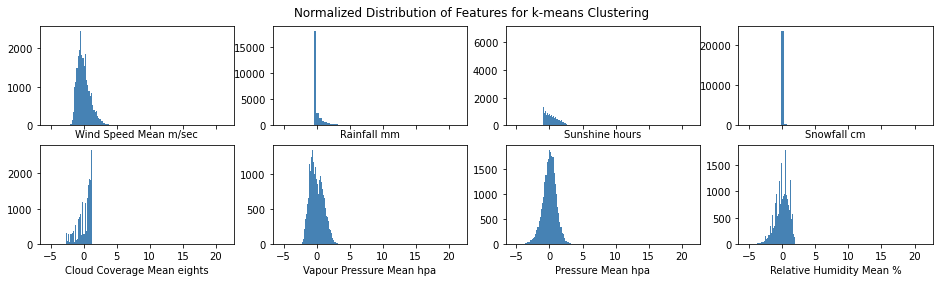

In [132]:
fig, axs = plt.subplots(2, 4, figsize=(16,4), sharex=True)

sns.distplot(X_scaled["Wind Speed Mean m/sec"], kde=False, color="steelblue", 
             hist_kws=dict(alpha=1), ax=axs[0, 0])
sns.distplot(X_scaled["Rainfall mm"], kde=False, color="steelblue", 
             hist_kws=dict(alpha=1), ax=axs[0, 1])
sns.distplot(X_scaled["Sunshine hours"], kde=False, color="steelblue", 
             hist_kws=dict(alpha=1), ax=axs[0, 2])
sns.distplot(X_scaled["Snowfall cm"], kde=False, color="steelblue", 
             hist_kws=dict(alpha=1), ax=axs[0, 3])
sns.distplot(X_scaled["Cloud Coverage Mean eights"], kde=False, color="steelblue", 
             hist_kws=dict(alpha=1), ax=axs[1, 0])
sns.distplot(X_scaled["Vapour Pressure Mean hpa"], kde=False, color="steelblue", 
             hist_kws=dict(alpha=1), ax=axs[1, 1])
sns.distplot(X_scaled["Pressure Mean hpa"], kde=False, color="steelblue", 
             hist_kws=dict(alpha=1), ax=axs[1, 2])
sns.distplot(X_scaled["Relative Humidity Mean %"], kde=False, color="steelblue", 
             hist_kws=dict(alpha=1), ax=axs[1, 3])
plt.suptitle('Normalized Distribution of Features for k-means Clustering', y=.95);

The data can now be fit to the model.

### k-means Clustering

In [133]:
from sklearn.cluster import KMeans

# DO NOT replace 2 with 50 and run all from here unless you have lots and lots of time!!!
kmeans = KMeans(n_clusters=2)

X_scaled['Cluster'] = kmeans.fit_predict(X_scaled)
X_scaled['Cluster'] = X_scaled['Cluster'].astype('category')

display(X_scaled.head())

Temperature Mean °C  Wind Speed Mean m/sec  Rainfall mm  \
MESS_DATUM                                                            
1954-01-01            -1.794535              -1.351912    -0.461298   
1954-01-02            -1.780605              -1.010559    -0.070277   
1954-01-03            -1.251266               0.809989    -0.070277   
1954-01-04            -1.432356              -0.555422     0.164335   
1954-01-05            -2.170644              -0.100285    -0.461298   

            Sunshine hours  Snowfall cm  Cloud Coverage Mean eights  \
MESS_DATUM                                                            
1954-01-01        0.394768     0.238947                    0.083559   
1954-01-02       -1.017538    -0.183932                    0.851757   
1954-01-03       -0.251542     0.238947                   -0.588613   
1954-01-04       -1.017538     1.084703                    1.187843   
1954-01-05        0.011770     1.930460                   -2.173020   

            Vapour Pressure Mean hpa  Pressure Mean hpa  \
MESS_DATUM                                                
1954-01-01                 -1.366152           1.864438   
1954-01-02                 -1.467570           1.758207   
1954-01-03                 -1.163316          -0.855064   
1954-01-04                 -1.214025          -0.068958   
1954-01-05                 -1.619698           0.780886   

            Relative Humidity Mean % Cluster  
MESS_DATUM                                    
1954-01-01                  1.165396       1  
1954-01-02                  0.987366       1  
1954-01-03                  0.364259       1  
1954-01-04                  0.987366       1  
1954-01-05                  0.453275       1

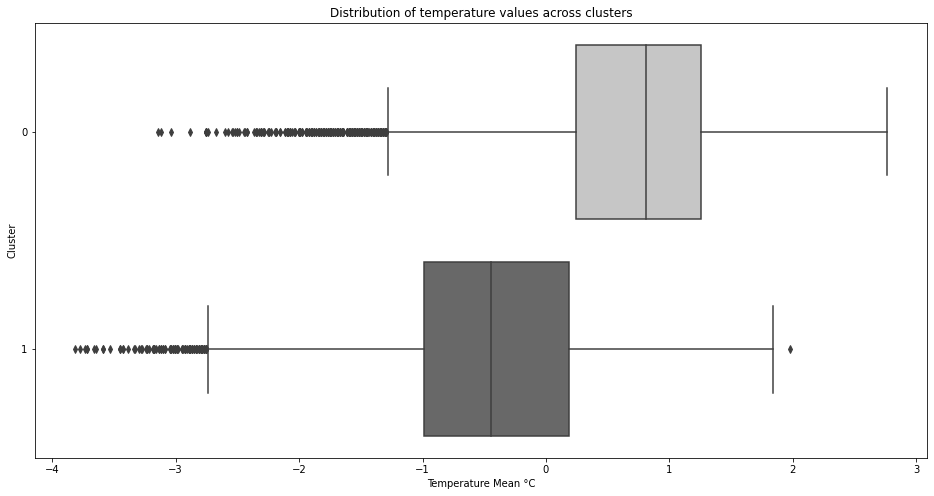

In [134]:
sns.boxplot(x='Temperature Mean °C', y='Cluster', data=X_scaled, palette='Greys')
plt.title('Distribution of temperature values across clusters');

#### Number of Observations per Cluster

In [135]:
display(X_scaled['Cluster'].value_counts().head(3))
display(X_scaled['Cluster'].value_counts().tail(3))

1    14989
0     9685
Name: Cluster, dtype: int64

1    14989
0     9685
Name: Cluster, dtype: int64

#### Group by Cluster for Temperature

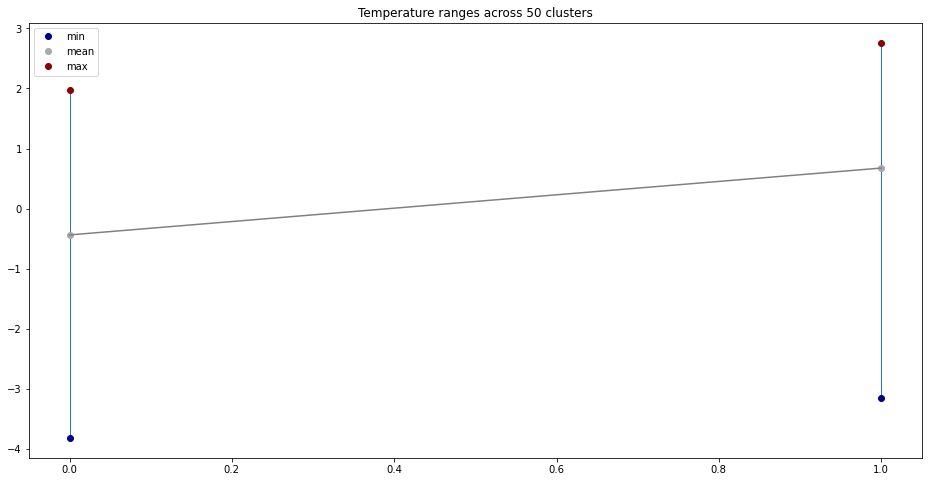

In [136]:
df_clustered = X_scaled.groupby('Cluster')['Temperature Mean °C'] \
                       .agg(['min', 'mean', 'max']) \
                       .sort_values('mean') \
                       .reset_index()
df_clustered.plot(lw=0, marker='o', color=['darkblue', 'darkgrey', 'darkred'])
df_clustered['mean'].plot(color='grey')

for i, row in df_clustered.iterrows():
    plt.vlines(i, row['min'], row['max'], lw=1)
    
plt.title('Temperature ranges across 50 clusters')
plt.savefig('Temperature ranges across 50 clusters.png', bbox_inches='tight');

### Split X-scaled into training and test sets

In [137]:
from sklearn.model_selection import train_test_split

print(X_scaled.shape)

X = X_scaled.drop(['Cluster', 'Temperature Mean °C'], axis=1)
y = X_scaled['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=10)

# print(X_train.shape, y_train.value_counts()/len(y_train), sep='\n')
# print(X_test.shape, y_test.value_counts()/len(y_test), sep='\n')

(24674, 10)


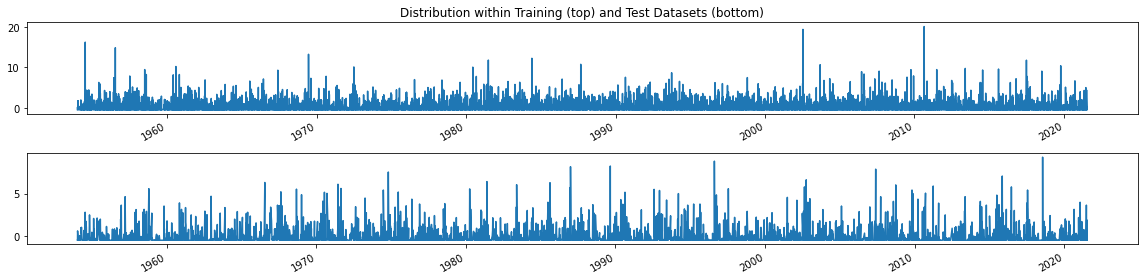

In [138]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,4))
X_train['Rainfall mm'].sort_index().plot(ax=ax1)
X_test['Rainfall mm'].sort_index().plot(ax=ax2)
ax1.set_title('Distribution within Training (top) and Test Datasets (bottom)')
ax1.set_xlabel('')
ax2.set_xlabel('')
plt.tight_layout()
plt.savefig('Test_Train_Data.png', bbox_inches='tight');

### Decision Tree Model

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
all_scores = []
scores = ['precision', 'recall', 'fscore', 'support']

dcresult = []
for num in range(10, 101, 1):
    dcmodel = DecisionTreeClassifier(max_leaf_nodes=num)
    dcmodel.fit(X_train, y_train)
    dcmodel_predict = dcmodel.predict(X_test)
    dcresult.append(round(accuracy_score(y_test, dcmodel_predict),3))
    
max_leaf_nodes = dcresult.index(max(dcresult)) + 11

dcmodel = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes)

print('','max leaf nodes: ' + str(max_leaf_nodes), sep='\n')

dcmodel.fit(X_train, y_train)
print('score =', dcmodel.score(X_test, y_test))


max leaf nodes: 69
score = 0.9408308004052685


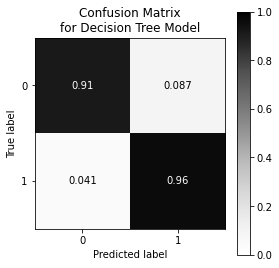

In [140]:
fig, ax = plt.subplots(figsize=(4,4))
rfdisp = plot_confusion_matrix(dcmodel, X_test, y_test, normalize='true', ax=ax, 
                               cmap=plt.cm.Greys, include_values=True)
rfdisp.im_.set_clim(0, 1)
plt.title('Confusion Matrix\nfor Decision Tree Model')
plt.tight_layout()
plt.savefig('DC Confusion Matrix.png', bbox_inches='tight');

#### Plot/Print the Decision Tree

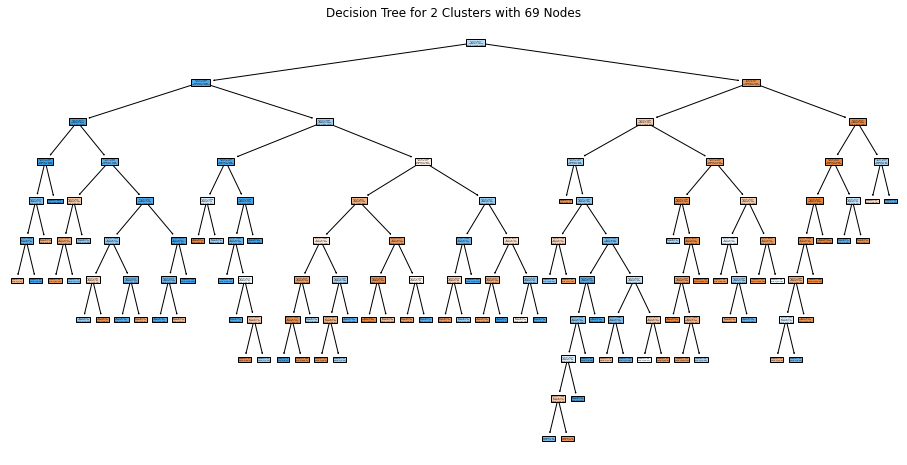

In [141]:
from sklearn.tree import plot_tree
plot_tree(dcmodel, filled=True)
plt.title('Decision Tree for 2 Clusters with ' + str(max_leaf_nodes) + ' Nodes')
plt.savefig('Decision Tree Graphics.png', bbox_inches='tight');

In [142]:
from sklearn.tree import export_text
print(export_text(dcmodel, feature_names=X_train.columns.to_list())[:500])

|--- Sunshine hours <= 0.13
|   |--- Sunshine hours <= -0.33
|   |   |--- Vapour Pressure Mean hpa <= 0.90
|   |   |   |--- Relative Humidity Mean % <= -1.28
|   |   |   |   |--- Vapour Pressure Mean hpa <= 0.02
|   |   |   |   |   |--- Cloud Coverage Mean eights <= -0.13
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Cloud Coverage Mean eights >  -0.13
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Vapour Pressure Mean hpa >  0.02
|   |   |   |   |   |--- class: 0
| 


### k-Nearest Neighbor

In [143]:
from sklearn.neighbors import KNeighborsClassifier

knnresult = []

for num in range(1, 21):
    print(num, end=' ')
    knnmodel = KNeighborsClassifier(n_neighbors=num)
    knnmodel.fit(X_train, y_train)
    knnmodel_predict = knnmodel.predict(X_test)
    knnresult.append(round(accuracy_score(y_test, knnmodel_predict),4))

knnmodel = KNeighborsClassifier(n_neighbors=knnresult.index(max(knnresult)) + 1)
print('','number of neighbours: ' + str(knnresult.index(max(knnresult)) + 1), sep='\n')

knnmodel.fit(X_train, y_train)
print('score =', knnmodel.score(X_test, y_test))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 
number of neighbours: 20
score = 0.9787234042553191


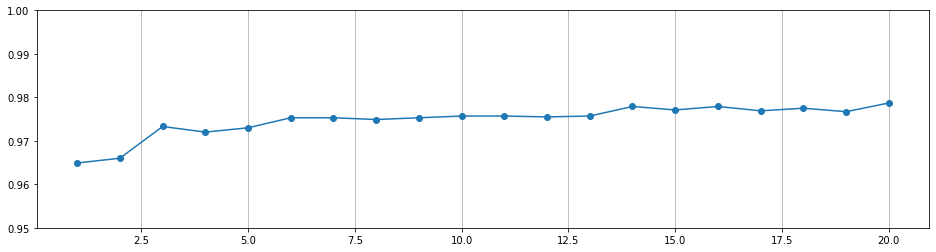

In [144]:
plt.figure(figsize=(16,4))
plt.plot(list(range(1, 21)), knnresult, marker='o')
plt.grid(axis='x')
plt.ylim(0.95, 1)
plt.savefig('knnresults.png', bbox_inches='tight');

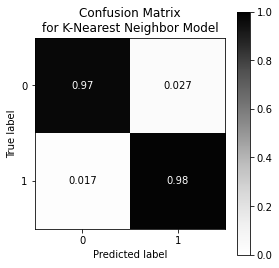

In [145]:
fig, ax = plt.subplots(figsize=(4,4))
rfdisp = plot_confusion_matrix(knnmodel, X_test, y_test, normalize='true', ax=ax, 
                               cmap=plt.cm.Greys, include_values=True)
rfdisp.im_.set_clim(0, 1)
plt.title('Confusion Matrix\nfor K-Nearest Neighbor Model')
plt.tight_layout()
plt.savefig('KNN Confusion Matrix.png', bbox_inches='tight')

### Gradient Boosting

In [146]:
from sklearn.ensemble import GradientBoostingClassifier

gbcnumber = []
gbcresult = []

for num in range(100, 1001, 50):
    gbcnumber.append(num)
    print(num, end=' ')
    gbcmodel = GradientBoostingClassifier(n_estimators=num,
                                          max_leaf_nodes=max_leaf_nodes,
                                          learning_rate=0.1,
                                          loss='deviance')
    gbcmodel.fit(X_train, y_train)
    gbcmodel_predict = gbcmodel.predict(X_test)
    gbcresult.append(round(accuracy_score(y_test, gbcmodel_predict),4))


print(gbcresult)

n_estimators = gbcnumber[gbcresult.index(max(gbcresult))]
                          
gbcmodel = GradientBoostingClassifier(n_estimators=n_estimators,
                                      max_leaf_nodes=max_leaf_nodes,
                                      learning_rate=0.1, loss='deviance')

print('','number of estimators: ' + str(n_estimators), sep='\n')

gbcmodel.fit(X_train, y_train)
print('score =', gbcmodel.score(X_test, y_test))

100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850 900 950 1000 [0.9761, 0.9803, 0.9824, 0.984, 0.9846, 0.9854, 0.9872, 0.987, 0.9876, 0.9874, 0.9874, 0.988, 0.9876, 0.9876, 0.9878, 0.988, 0.9882, 0.9876, 0.9878]

number of estimators: 900
score = 0.9882472137791287


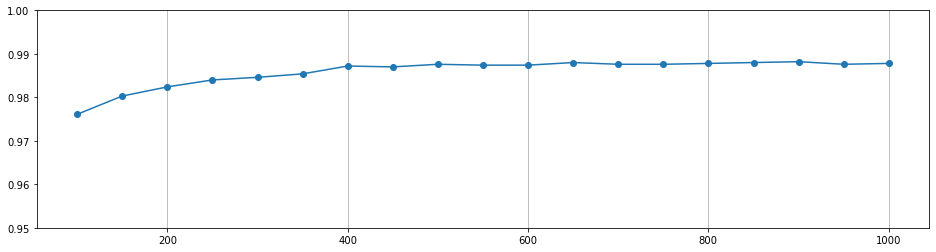

In [147]:
plt.figure(figsize=(16,4))
plt.plot(gbcnumber, gbcresult, marker='o')
plt.grid(axis='x')
plt.ylim(0.95, 1)
plt.savefig('gbcresults.png', bbox_inches='tight');

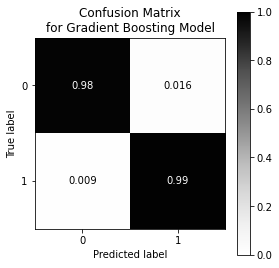

In [148]:
fig, ax = plt.subplots(figsize=(4,4))
rfdisp = plot_confusion_matrix(gbcmodel, X_test, y_test, normalize='true', ax=ax, 
                               cmap=plt.cm.Greys, include_values=True)
rfdisp.im_.set_clim(0, 1)
plt.title('Confusion Matrix\nfor Gradient Boosting Model')
plt.tight_layout()
plt.savefig('GBC Confusion Matrix.png', bbox_inches='tight')